# Predicción de cancelaciones de Reservas de Hoteles

## 1. Situación problemática

La industria hotelera se remonta a la antigüedad, en donde la necesidad de intercambiar productos entre las diferentes civilizaciones, hacia que los comerciantes viajaran de un país a otro para realizar este intercambio. Al principio, estas posadas solo ofrecían servicios básicos, pero a medida que pasaba el tiempo y crecía la demanda de alojamiento a corto plazo, los propietarios de los hoteles se preparaban para brindar a los huéspedes más facilidades. Desde entonces, la industria hotelera se expandió aún más a medida que las personas estaban dispuestas a pagar más por servicios de mejor calidad. Esta industria siempre se ha esforzado por satisfacer las demandas cambiantes de la sociedad y se ha convertido en una parte esencial de la economía. Hoy en día, los viajeros pueden encontrar diferentes tipos de alojamiento en función de su presupuesto, desde bed and breakfast económicos hasta lujosos hoteles de 5 estrellas.

Un problema crítico en la industria hotelera es el de las cancelaciones, que se han disparado en los últimos tiempos. Actualmente, existe una clara diferencia entre los hoteles que reciben una reserva y la intención real de hospedarse. Este problema perjudica la rentabilidad de los hoteles quienes inmovilizan recursos (habitaciones, lugar en los espacios comunes del hotel, ammenities, comida, personal, etc) en una venta que finalmente no se concretará en detrimento de otras ventas que sí podrían concretarse. Surge la necesidad, por lo tanto, de diferenciar estas reservas "por si acaso" del resto de las reservas con una menor probabilidad de cancelación. 

El Machine Learning con sus algoritmos de clasificación surge como un aliado estratégico en este tipo de negocios, por su capacidad de predecir con un alto porcentaje de acierto si una reserva va a continuar o será cancelada, utilizando datos históricos. Por su parte, la incorporación continua de tecnología en el sector hotelero (softwares de gestión, herramientas informáticas para optimizar procesos y transacciones, conectividad) permite implementar estos modelos prácticamente en tiempo real. En conjunto, un modelo de Machine Learning específico para la industria hotelera le permitirá priorizar la reserva segura, mejorar la rentabilidad y mejorar la oferta de servicios para los clientes.


  


## 2. Objetivo

En base la problematica planteada, se realizará un análisis de las variables del dataset, con el fin de evaluar cuales son aquellas que llevan a la decisión de cancelar la reserva. Una vez identificadas, se creará un modelo de clasificación que permite predecir la probabilidad de que un cliente continúe con su reserva o la cancele. Esta herramienta permitirá aplicar mejoras en el servicio y lograr el máximo nivel de alojamiento ocupado, teniendo en cuenta la disponibilidad de reservas que probablemente se cancelen. 

La variable target es "is_canceled".


## 3. Equipo de trabajo

- Abadia, Bernadette
- Auad, Cynthia
- Benega, Ariel
- Godoy, Ezequiel

Comision 19155 - Data Science - CODERHOUSE

## 4. Dataset



### Fuente

El dataset fue publicado por primera vez en el paper:
Nuno Antonio, Ana de Almeida, Luis Nunes. **Hotel booking demand datasets.** *Data in Brief*, Volume 22, 2019, Pages 41-49. ISSN 2352-3409,
https://doi.org/10.1016/j.dib.2018.11.126.
(https://www.sciencedirect.com/science/article/pii/S2352340918315191)

El dataset utilizado en este trabajo se obtuvo de:
https://www.kaggle.com/datasets/mojtaba142/hotel-booking

### Características generales

Este dataset contiene datos de demanda hotelera para dos hoteles, uno tipo resort y otro urbano, ubicados en Lisboa, Portugal. El dataset posee 119.390 filas, cada una de las cuales es una reserva de hotel que debía llegar entre el 1 de julio de 2015 y el 31 de agosto de 2017, incluidas las reservas que efectivamente llegaron y las reservas que se cancelaron. 
El dataset contiene además 36 variables entre las que se describen atributos de los clientes (10 variables), las transacciones (2 variables) y las reservas (13 variables). En la siguiente sección se provee una descripción detallada de las mismas. 
Dado que el dataset original contenía datos reales, los autores eliminaron la identificación del cliente y del hotel y la reemplazaron por datos ficiticios.










### Criterios de selección

El dataset se consideró adecuado por tener un número suficiente de filas y columnas, por tener una variable target relativamente balanceada, por tener suficiente cantidad de variables (cuantitativas y categóricas) y por tener escasos datos faltantes. Los análisis que permitieron llegar a estas conclusiones se describen en detalle en las siguientes secciones del proyecto.

## 5. Data wrangling 

### Importación y lectura del dataset 

Paquetes utilizados:

In [ ]:
import pandas as pd
import numpy as np
from numpy import median
from sklearn.pipeline import Pipeline 

# Liberias para realizar graficas
import missingno as msno            # libreria para graficar la presencia de nans
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import plotly.graph_objects as go    # libreria para realizar un frafico radar

# Preprocesamiento
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


# Librerias de tiempo
import time
from datetime import date, datetime, timedelta
import datetime as dt


#  Librerias para armar los modelos (train y test)
from sklearn.model_selection import train_test_split 

# Librerias para modelos de clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc   


In [ ]:
import warnings
warnings.filterwarnings('ignore') #para que no se muestren los warnings y quede el notebook más prolijo

In [ ]:
pip install dexplot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 173 kB 7.8 MB/s 


In [ ]:
import dexplot as dxp

Acceso al dataset:

In [ ]:
url = 'https://drive.google.com/file/d/1OYaeRfVVCVEfcZiPP9zCufz9_J2p5WQz/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_orig = pd.read_csv(path)

Visualización del dataset:

In [ ]:
pd.set_option('display.max_columns', 500) #para que se muestren todas las columnas del dataset

In [ ]:
pd.set_option('display.precision', 3) #para mostrar 3 cifras decimales
np.set_printoptions(precision=3)

In [ ]:
df_orig.head() #primeras filas

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df_orig.info() #nombres de las columnas, tipos de datos y cantidad de nulos por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Diccionario de variables

A continuacion se carga un excel con el significado o glosario de cada variable.

In [ ]:
#importar tabla excel con descripción
#url = 'https://docs.google.com/spreadsheets/.....'
#path = 'https://drive.google.com'+url.split('/')[-2]
df_variables = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vQU4YZN6Bl11R1S1K-qviBgVpQLFc3pmWN1oIpv20C7S51Xdzvci-zT_TgwfpP-4Q/pub?output=xlsx')

In [ ]:
df_variables = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vQU4YZN6Bl11R1S1K-qviBgVpQLFc3pmWN1oIpv20C7S51Xdzvci-zT_TgwfpP-4Q/pub?output=xlsx')

In [ ]:
df_variables

,Variable,Descripción
0,hotel,Hotel resort o urbano
1,is_canceled,"Canceló la reserva: No (0), Sí (1)"
2,lead_time,Tiempo de entrega: tiempo que discurre desde q...
3,arrival_date_year,Año de la llegada
4,arrival_date_month,Mes de la llegada (desde enero a diciembre)
5,arrival_date_week_number,Semana de llegada
6,arrival_date_day_of_month,Día de llegada
7,stays_in_weekend_nights,Estadía en noches de fin de semana
8,stays_in_week_nights,Estadía en noches de semana
9,adults,Adultos


### Análisis de datos faltantes

In [ ]:
df_orig.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

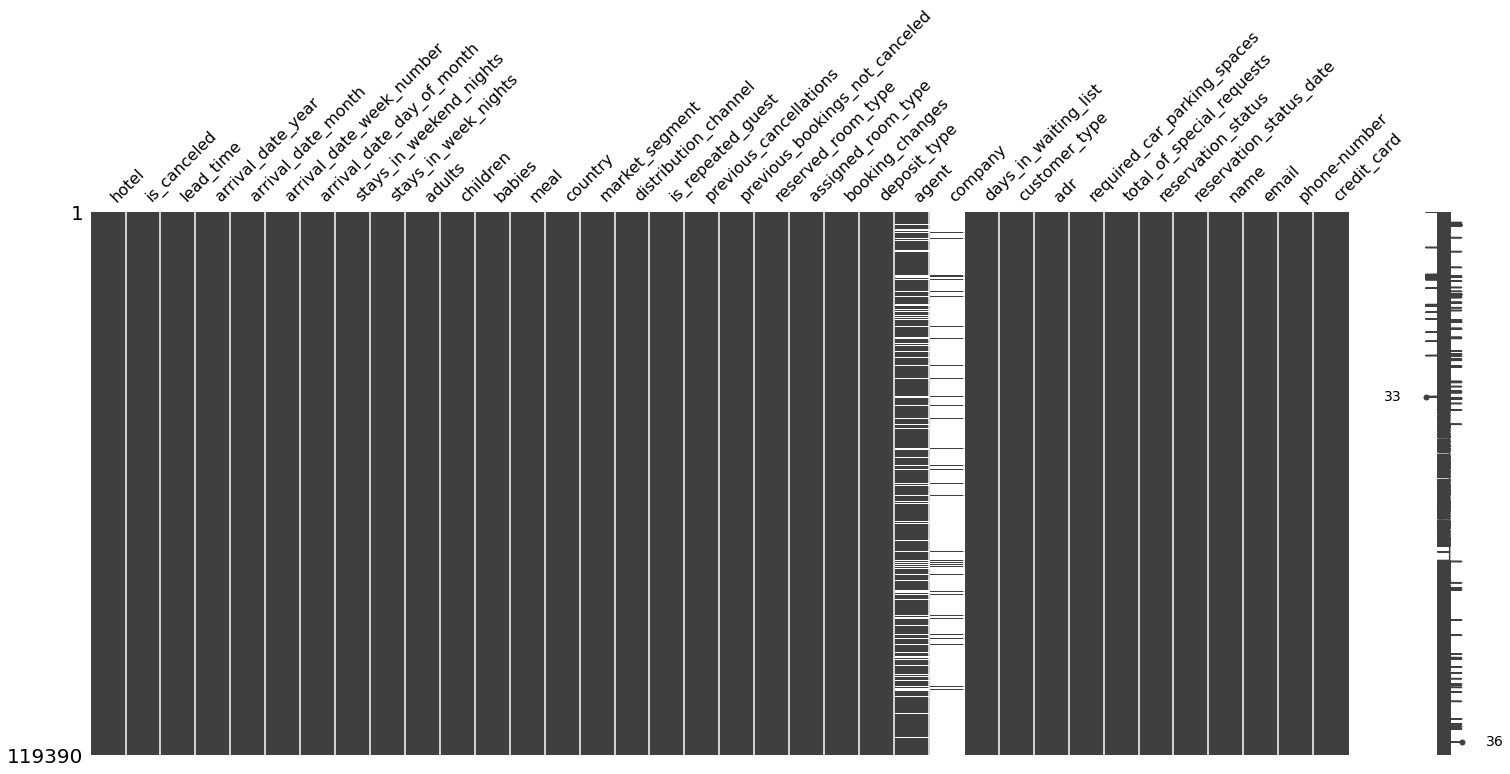

In [ ]:
msno.matrix(df_orig)

### Primera eliminación de variables

In [ ]:
# se verifica si hay datos duplicados
df_orig[df_orig.duplicated() == True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


No se encuentran valores duplicados.

A partir de la primera visualización del dataset, se eliminan las siguientes variables: 
- "Agent" y "Company" porque contienen muchos valores nulos. 
- Columnas con información personal (nombre, email, teléfono y tarjeta de crédito) por ser irrelevantes para la predicción.

In [ ]:
df = df_orig.drop(['agent', 'company', 'name', 'email', 'phone-number', 'credit_card'], axis=1) #el dataset original lo dejamos tal cual. Generamos el df para trabajar.

In [ ]:
df.head() #vemos cómo queda el df luego de eliminar las columnas 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe(include='all') #hacemos la estadística descriptiva del df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000,119390.000,119390.000,119390,119390.000,119390.000,119390.000,119390.000,119390.000,119386.000,119390.000,119390,118902,119390,119390,119390.000,119390.000,119390.000,119390,119390,119390.000,119390,119390.000,119390,119390.000,119390.000,119390.000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370,104.011,2016.157,NaN,27.165,15.798,0.928,2.500,1.856,0.104,0.008,NaN,NaN,NaN,NaN,0.032,0.087,0.137,NaN,NaN,0.221,NaN,2.321,NaN,101.831,0.063,0.571,NaN,NaN
std,NaN,0.483,106.863,0.707,NaN,13.605,8.781,0.999,1.908,0.579,0.399,0.097,NaN,NaN,NaN,NaN,0.176,0.844,1.497,NaN,NaN,0.652,NaN,17.595,NaN,50.536,0.245,0.793,NaN,NaN
min,NaN,0.000,0.000,2015.000,NaN,1.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,0.000,NaN,0.000,NaN,-6.380,0.000,0.000,NaN,NaN
25%,NaN,0.000,18.000,2016.000,NaN,16.000,8.000,0.000,1.000,2.000,0.000,0.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,0.000,NaN,0.000,NaN,69.290,0.000,0.000,NaN,NaN
50%,NaN,0.000,69.000,2016.000,NaN,28.000,16.000,1.000,2.000,2.000,0.000,0.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,0.000,NaN,0.000,NaN,94.575,0.000,0.000,NaN,NaN
75%,NaN,1.000,160.000,2017.000,NaN,38.000,23.000,2.000,3.000,2.000,0.000,0.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,0.000,NaN,0.000,NaN,126.000,0.000,1.000,NaN,NaN


### Cambio de tipos de datos

Conversión de variables que son categóricas pero se importaron como numéricas:

In [ ]:
df.arrival_date_week_number = df.arrival_date_week_number.astype('object') 
df.meal = df.meal.astype('object')    
df.is_canceled = df.is_canceled.astype('object')
df.is_repeated_guest = df.is_repeated_guest.astype('object')

Las variables "arrival_date_year" y "arrival_date_day_of_month" por el momento las dejamos como están porque las utilizaremos luego para crear la variable "Fecha".

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  object 
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Creación de variable Fecha (datetime) para análisis temporal

In [ ]:
# Diccionario con los nombres de los meses y su correspondiente formato en numeros
mes = {  'January':1,
        'February':2,
        'March':3,
        'April':4,
        'May':5,
        'June':6,
        'July':7,
        'August':8,
        'September':9,
        'October':10,
        'November':11,
        'December':12
        }

In [ ]:
df = df.assign(Mes_numero=0)                    #creo una nueva columna
df.Mes_numero = df.arrival_date_month              #copio la columna de mes (str)
df.replace({"Mes_numero": mes}, inplace=True)         #el mes es un str entonces llama a al dic creado para pasarlo a numero

                            # creo una columna nueva llamada Date. Convierto a Datetime.
df['Date'] = pd.to_datetime({'year':df['arrival_date_year'],
                              'month':df['Mes_numero'],    
                              'day':df['arrival_date_day_of_month']
                              })


In [ ]:
df = df.drop('Mes_numero',axis=1)  #elimino esta columna creada para armar la fecha como datetime

In [ ]:
df.head()    # veo el dataframe completo con la nueva columna de fecha

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [ ]:
df.info()       # compruebo que la columna Date tiene formato de fecha.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  object        
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
# fechas más antiguas y más actuales
max_fecha = df['Date'].max()
min_fecha = df['Date'].min()
print('Se observan reservas desde {} a {}'.format(min_fecha, max_fecha))

Se observan reservas desde 2015-07-01 00:00:00 a 2017-08-31 00:00:00


## 6. Análisis exploratorio de los datos

### Análisis Univariado

#### Variables cuantitativas

In [ ]:
df_cuanti= df.select_dtypes(include=np.number) #para el análisis exploratorio de variables cuantitativas, armamos un dataframe solo de cuantitativas
df_cuanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_year               119390 non-null  int64  
 2   arrival_date_day_of_month       119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  days_in_waiting_list            119390 non-null  int64  
 12  adr             

In [ ]:
df_cuanti = df_cuanti.drop(['arrival_date_year', 'arrival_date_day_of_month'], axis=1) #sacamos las variables de fechas porque no son cuantitativas

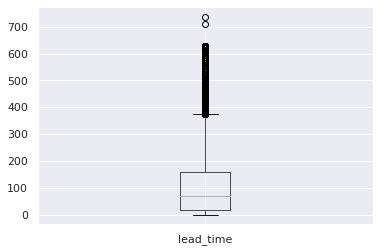

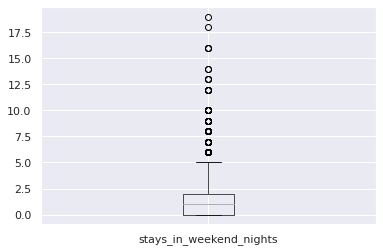

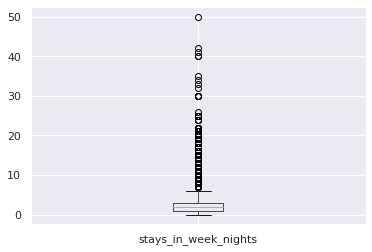

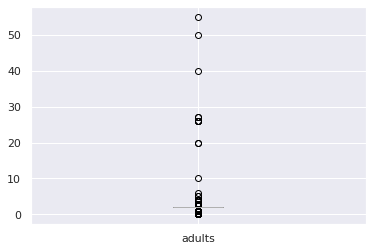

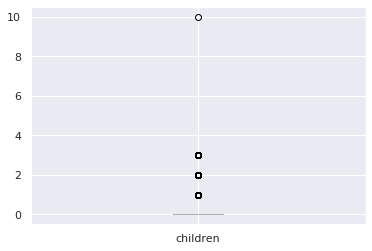

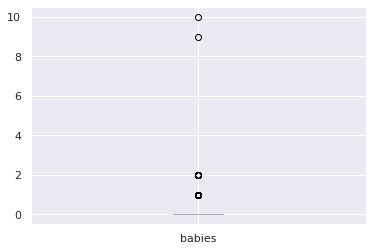

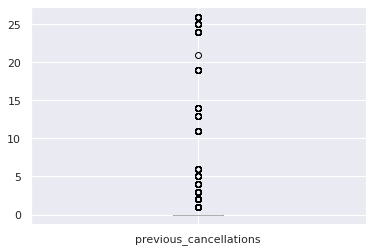

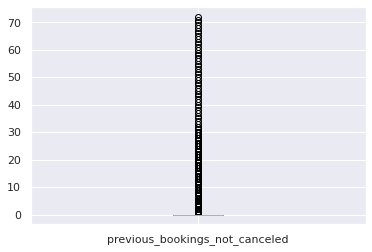

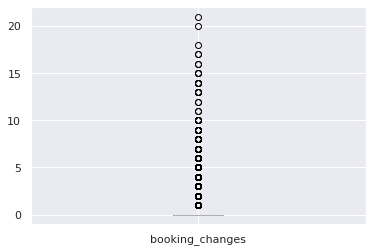

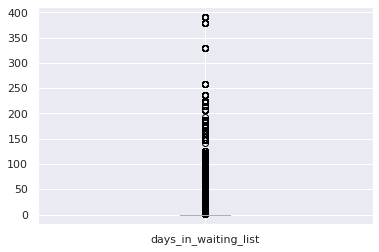

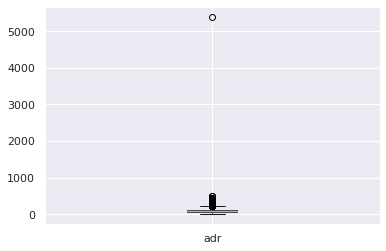

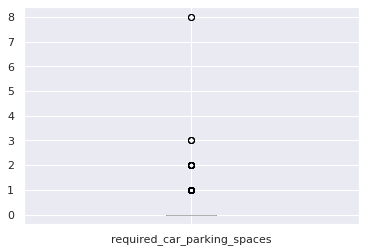

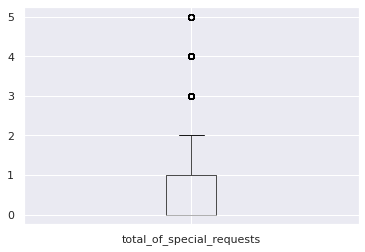

In [ ]:
for i in df_cuanti:
    df_cuanti.boxplot(column=i)
    plt.show()  

En la mayoría de los gráficos, las cajas se encuentran colapsadas (los rangos intercuartílicos de las variables son muy pequeños) y se observan muchos outliers, por lo tanto no son muy informativos. Algunas de estas variables se analizan en detalle más abajo.

#### Variables cualitativas

In [ ]:
df_cuali= df.select_dtypes(include=object) #para el análisis exploratorio de variables cualitativas, armamos un dataframe solo de cualitativas
df_cuali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   hotel                     119390 non-null  object
 1   is_canceled               119390 non-null  object
 2   arrival_date_month        119390 non-null  object
 3   arrival_date_week_number  119390 non-null  object
 4   meal                      119390 non-null  object
 5   country                   118902 non-null  object
 6   market_segment            119390 non-null  object
 7   distribution_channel      119390 non-null  object
 8   is_repeated_guest         119390 non-null  object
 9   reserved_room_type        119390 non-null  object
 10  assigned_room_type        119390 non-null  object
 11  deposit_type              119390 non-null  object
 12  customer_type             119390 non-null  object
 13  reservation_status        119390 non-null  object
 14  rese

In [ ]:
#excluimos variables de fechas que tienen muchas clases para visualizar mejor el resto
df_cuali = df_cuali.drop(columns=['arrival_date_month', 'arrival_date_week_number','reservation_status_date']) 
df_cuali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel                 119390 non-null  object
 1   is_canceled           119390 non-null  object
 2   meal                  119390 non-null  object
 3   country               118902 non-null  object
 4   market_segment        119390 non-null  object
 5   distribution_channel  119390 non-null  object
 6   is_repeated_guest     119390 non-null  object
 7   reserved_room_type    119390 non-null  object
 8   assigned_room_type    119390 non-null  object
 9   deposit_type          119390 non-null  object
 10  customer_type         119390 non-null  object
 11  reservation_status    119390 non-null  object
dtypes: object(12)
memory usage: 10.9+ MB


In [ ]:
#vemos nombre y cantidad de clases de las variables categóricas
for col in df_cuali.columns:
    print(df_cuali[col].unique())
    print(df_cuali[col].nunique())  

['Resort Hotel' 'City Hotel']
2
[0 1]
2
['BB' 'FB' 'HB' 'SC' 'Undefined']
5
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'M

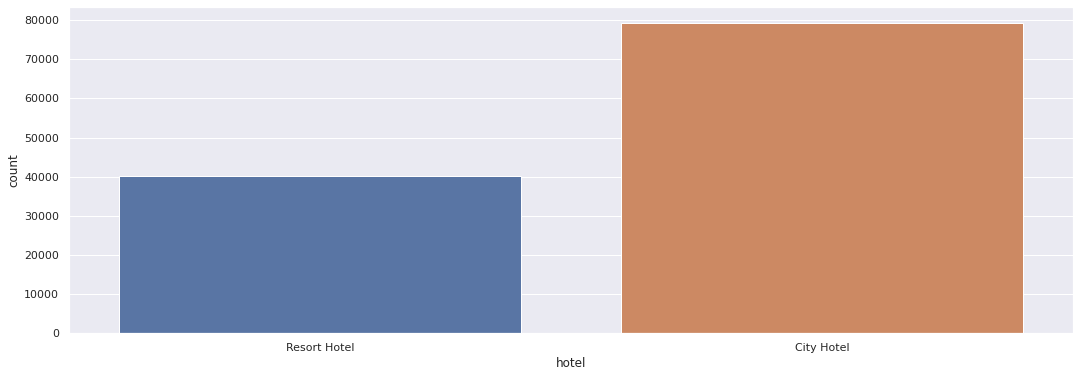

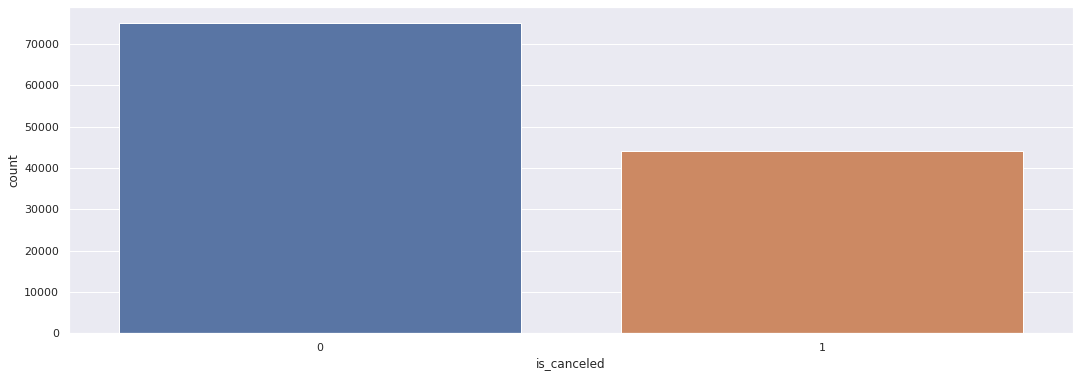

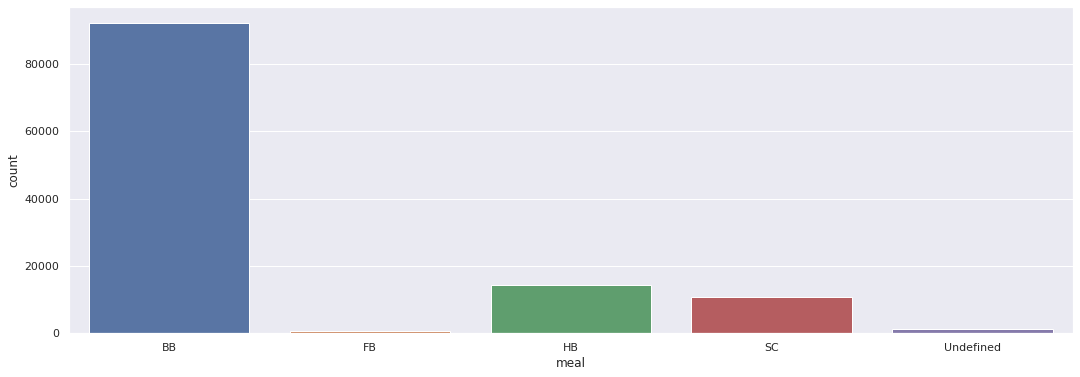

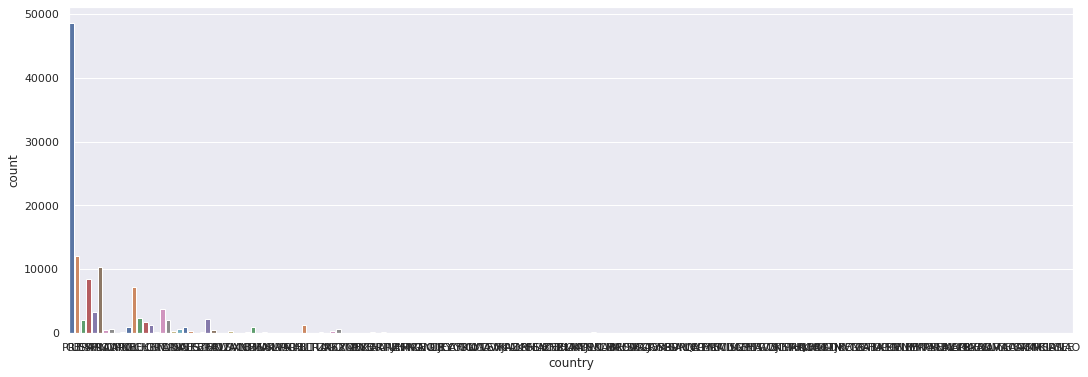

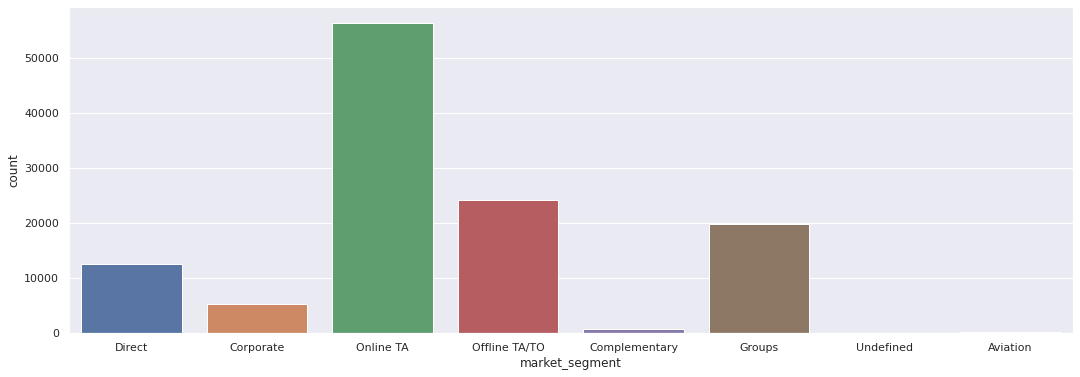

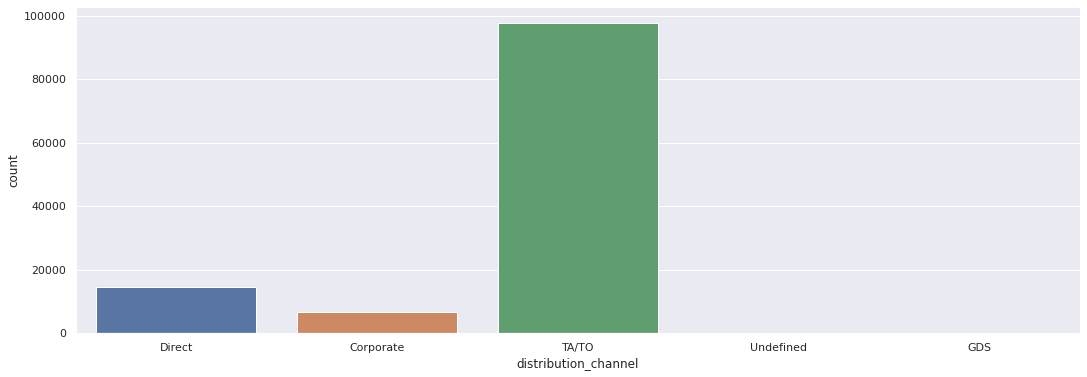

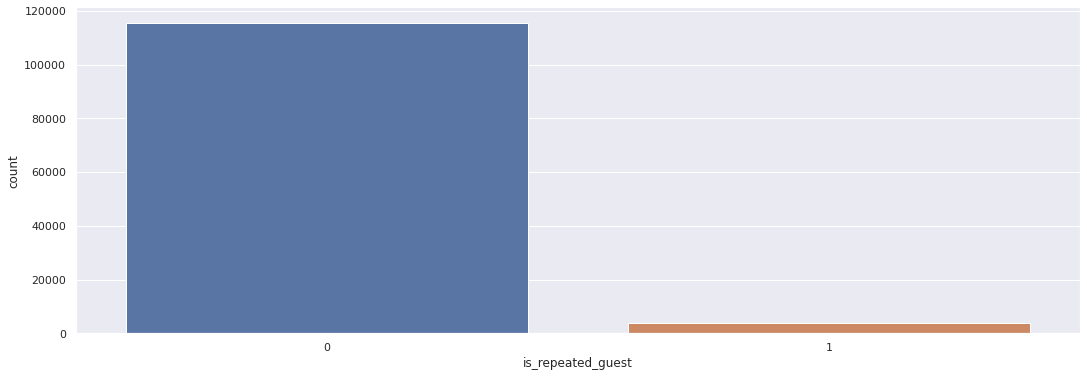

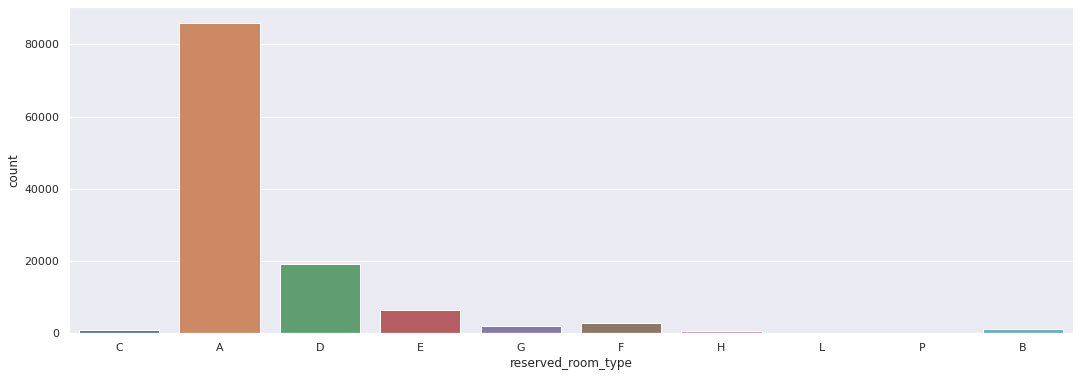

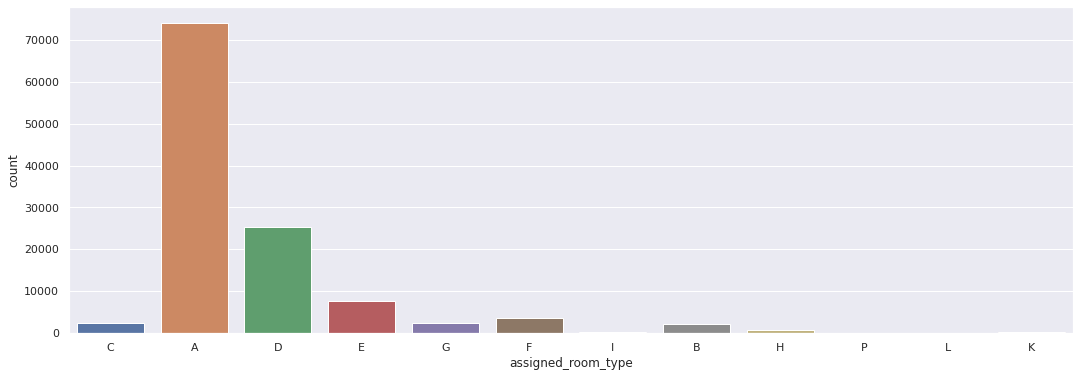

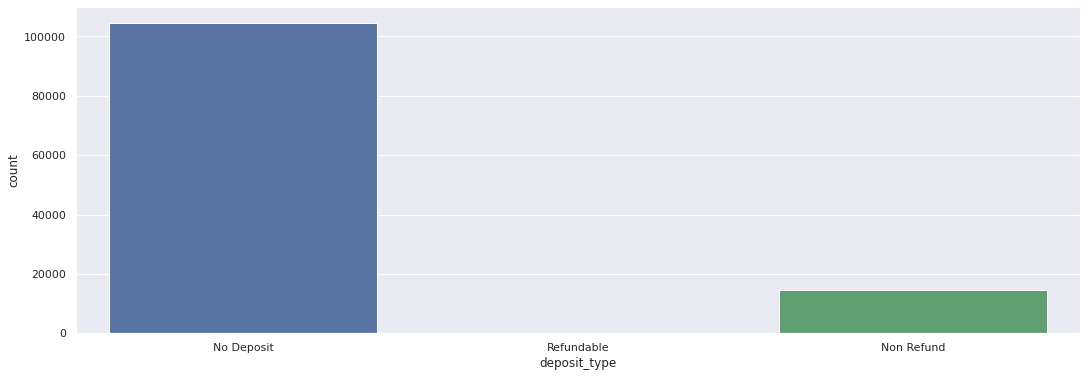

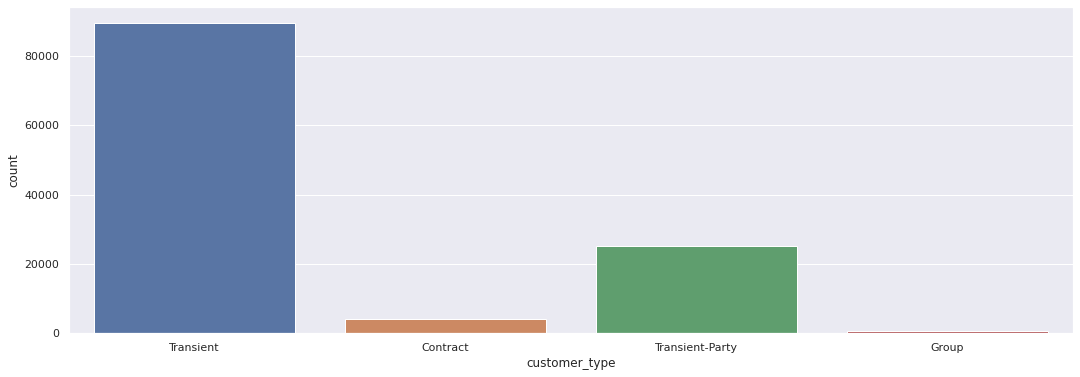

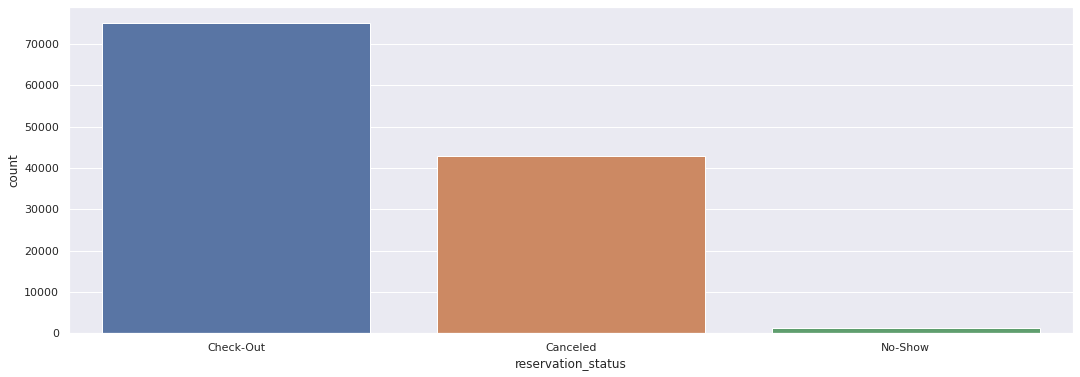

In [ ]:
for i in df_cuali:
    plt.figure(figsize=(18, 6))
    sns.countplot(x =i, data = df_cuali, palette = 'deep')
    sns.set(font_scale = 1)
    plt.show()  


A continuación analizamos con mayor detalle algunas variables vistas en el análisis exploratorio general.

#### *Variable target "is_canceled"* (categórica)

In [ ]:
df['is_canceled'].describe()

count     119390
unique         2
top            0
freq       75166
Name: is_canceled, dtype: int64

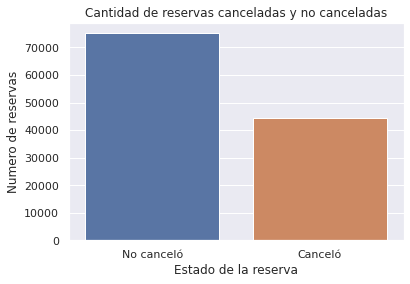

In [ ]:
labels = ('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.countplot(data=df, x= "is_canceled", palette='deep') #countplot realiza automáticamente el recuento en cada categoría
ax.set_xticklabels(labels)
ax.set_xlabel('Estado de la reserva')     #label x
ax.set_ylabel('Numero de reservas')     #label y
ax.set_title('Cantidad de reservas canceladas y no canceladas')  #título
plt.show()

In [ ]:
pal = sns.color_palette("deep") #códigos de la paleta de colores a utilizar
print(pal.as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


In [ ]:
df['is_canceled'].value_counts().mul(100)/len(df)

0    62.958
1    37.042
Name: is_canceled, dtype: float64

Observando la variable target "is_canceled" se puede ver la proporcion de reservas que NO fueron canceladas (63%) respecto a las que sí lo fueron (37%).

#### *Variable "previous_cancellations" (cuantitativa discreta).*

In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2.assign(Cancelacion_previa=0) 
df2.loc[df2.previous_cancellations<1,'Cancelacion_previa']='No'     # si es 0, pone No
df2.loc[df2.previous_cancellations>0,'Cancelacion_previa']='Si'     # si es 1, pone Si
#df2.head()
df2.Cancelacion_previa.value_counts().mul(100)/len(df)

No    94.569
Si     5.431
Name: Cancelacion_previa, dtype: float64

In [ ]:
df2['previous_cancellations'].describe(percentiles=[0.01, 0.1, .25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]) #como la variable toma valores pequeños, calculamos más percentiles para una mejor descripción.

count    119390.000
mean          0.087
std           0.844
min           0.000
1%            0.000
10%           0.000
25%           0.000
50%           0.000
75%           0.000
80%           0.000
90%           0.000
95%           1.000
99%           1.000
max          26.000
Name: previous_cancellations, dtype: float64

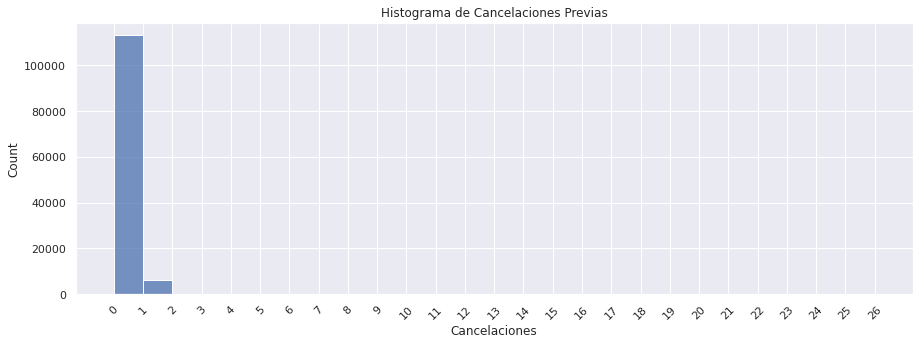

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.histplot(df2.previous_cancellations, binwidth=1, color = '#4c72b0')
ax.set_xlabel('Cancelaciones')    #label x
ax.set_title('Histograma de Cancelaciones Previas')  #título       
plt.xticks(np.arange(0, 27, 1), rotation = 45)
plt.show()

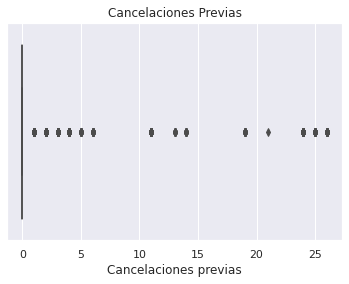

In [ ]:
sns.set(font_scale=1)
ax = sns.boxplot(df2.previous_cancellations) #permite ver mejor los outliers que el histograma
ax.set_xlabel('Cancelaciones previas')    #label x
ax.set_title('Cancelaciones Previas')  #título       
plt.show()

La variable "Previous cancellations" tiene alto porcentaje de ceros (90% de las observaciones) y cerca de un 10% tiene 1 cancelación. Esto se refleja en la altura de la barra del primer bin del histograma (el resto de las barras prácticamente no se observan) y en la caja colapsada en cero del gráfico de caja. Unos pocos clientes presentan valores inusualmente altos de cancelaciones previas (outliers) como se ve en el boxplot.  

#### *Variable "meal" (categórica)*

In [ ]:
df.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Segun el diccionario de variables hay 5 clases, 4 con regimenes de comida y 1 adicional que es Undefined.

In [ ]:
#from pandas.core.groupby import groupby
df_meal = df.groupby(['meal'])['meal'].count() #recuento de cada clase de la variable

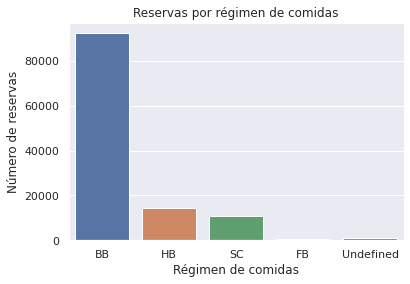

In [ ]:
#gráfico de barras de frecuencia absoluta
sns.set(font_scale=1)
ax = sns.countplot(data=df, x= "meal", palette='deep', order=['BB', 'HB', 'SC', 'FB', 'Undefined']) 
ax.set_xlabel('Régimen de comidas')    #label x
ax.set_ylabel('Número de reservas')     #label y
ax.set_title('Reservas por régimen de comidas')  #título       
plt.show()

In [ ]:
#cálculo de frecuencias relativas
df_meal = df.meal.value_counts().mul(100)/len(df) 
df_meal

BB           77.318
HB           12.114
SC            8.920
Undefined     0.979
FB            0.668
Name: meal, dtype: float64

In [ ]:
type(df_meal) #se obtiene una serie

pandas.core.series.Series

In [ ]:
df_meal_frec = pd.DataFrame(df_meal).reset_index()    
df_meal_frec.rename(columns={'index':'Meal','meal':'Frecuencia'},
               inplace=True)
df_meal_frec

,Meal,Frecuencia
0,BB,77.318
1,HB,12.114
2,SC,8.920
3,Undefined,0.979
4,FB,0.668


In [ ]:
type(df_meal_frec)

pandas.core.frame.DataFrame

In [ ]:
df_meal_frec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Meal        5 non-null      object 
 1   Frecuencia  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


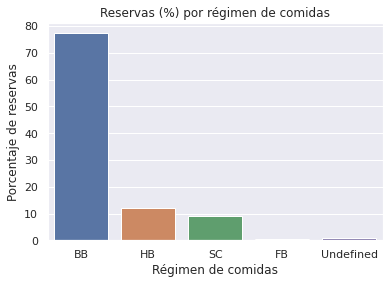

In [ ]:
#gráfico de barras de frecuencias relativas. Con dexplot es mucho más directo que con seaborn aunque menos prolijo (no se pueden modificar los ejes, labels, etc)
ax = sns.barplot(x="Meal", y="Frecuencia", data=df_meal_frec, palette='deep', order=['BB', 'HB', 'SC', 'FB', 'Undefined'])
sns.set(font_scale=1)
ax.set_xlabel('Régimen de comidas')    #label x
ax.set_ylabel('Porcentaje de reservas')     #label y
ax.set_title('Reservas (%) por régimen de comidas')  #título       
plt.show()

El gráfico de barras de frecuencia relativa es el más útil para representar la variable, ya que permite visualizar rápidamente que el régimen de comidas más elegido es sólo desayuno (BB, 77,3%), seguido prácticamente en iguales proporciones por media pensión (HB, 12,1%) y sin comidas (SC, 8,9%). El régimen de pensión completa (FB) representa sólo el 1% de las reservas. El gráfico de barras de frecuencias absolutas también nos permite ver cómo se ordenan las categorías según su frecuencia de aparición pero no se ve fácilmente qué proporción representa cada categoría con respecto al total.   

#### *Variable "adults" (cuantitativa discreta).*

In [ ]:
df['adults'].describe(percentiles=[0.01, 0.1, .25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]) #como la variable toma valores pequeños, calculamos más percentiles para una mejor descripción.

count    119390.000
mean          1.856
std           0.579
min           0.000
1%            1.000
10%           1.000
25%           2.000
50%           2.000
75%           2.000
80%           2.000
90%           2.000
95%           3.000
99%           3.000
max          55.000
Name: adults, dtype: float64

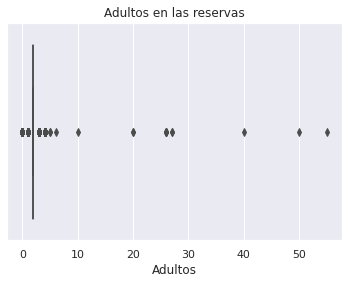

In [ ]:
sns.set(font_scale=1)
ax = sns.boxplot(df.adults)
ax.set_xlabel('Adultos')    #label x
ax.set_title('Adultos en las reservas')  #título
plt.show()

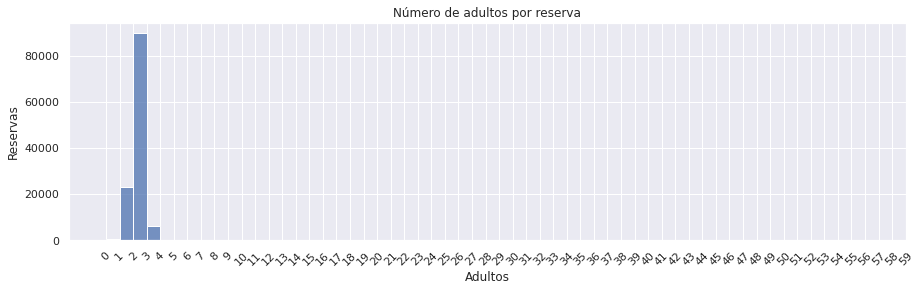

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.set(font_scale=1)
ax = sns.histplot(df.adults, binwidth=1)
ax.set_xlabel('Adultos')    #label x
ax.set_ylabel('Reservas')     #label y
ax.set_title('Número de adultos por reserva') #título
plt.xticks(np.arange(0, 60, 1), rotation = 45) #defino dónde quiero las marcas del eje x para que sea fácil visualizar los intervalos
plt.show()

Según la estadística descriptiva, el 90% de las reservas son para 2 adultos, de modo que la variable está concentrada en valores bajos (entre 0 y 2). Esto se refleja en el gráfico de caja, donde la caja está colapsada en el valor adultos = 2. Los valores menores o mayores a 2 se grafican como outliers (las reservas con un número grande de adultos podrían corresponder a contingentes o reservas grupales). En el histograma la preponderancia del valor adultos = 2 se refleja en la altura del tercer bin, que es muy superior a la altura de las demás barras. 

#### *Variable "arrival_date_month" (cualitativa)*

In [ ]:
df['arrival_date_month'].describe()

count     119390
unique        12
top       August
freq       13877
Name: arrival_date_month, dtype: object

In [ ]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

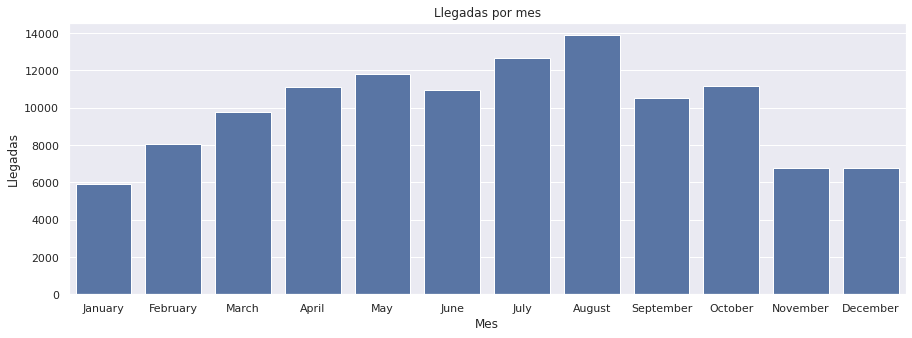

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.set(font_scale=1)
ax = sns.countplot(data=df, x= "arrival_date_month", palette= None, color = '#4c72b0', 
                   order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xlabel('Mes')    #label x
ax.set_ylabel('Llegadas')     #label y
ax.set_title('Llegadas por mes')  #título       
plt.show()

Las llegadas mensuales van aumentando desde el inicio del año hasta la mitad, siendo agosto el mes con mayor cantidad de llegadas seguido por julio, coincidiendo con el verano europeo. Las llegadas disminuyen en noviembre, diciembre y enero (invierno). Para ver un comportamiento más detallado, lo evaluamos por semana.

#### *Variable "arrival_date_week_number" (cualitativa ordinal)*

In [ ]:
df['arrival_date_week_number'].describe()

count     119390
unique        53
top           33
freq        3580
Name: arrival_date_week_number, dtype: int64

In [ ]:
df3 = df.groupby(['arrival_date_week_number'])['arrival_date_week_number'].count()
df3

arrival_date_week_number
1     1047
2     1218
3     1319
4     1487
5     1387
6     1508
7     2109
8     2216
9     2117
10    2149
11    2070
12    2083
13    2416
14    2264
15    2689
16    2405
17    2805
18    2926
19    2402
20    2785
21    2854
22    2546
23    2621
24    2498
25    2663
26    2391
27    2664
28    2853
29    2763
30    3087
31    2741
32    3045
33    3580
34    3040
35    2593
36    2167
37    2229
38    2661
39    2581
40    2397
41    2699
42    2756
43    2352
44    2272
45    1941
46    1574
47    1685
48    1504
49    1782
50    1505
51     933
52    1195
53    1816
Name: arrival_date_week_number, dtype: int64

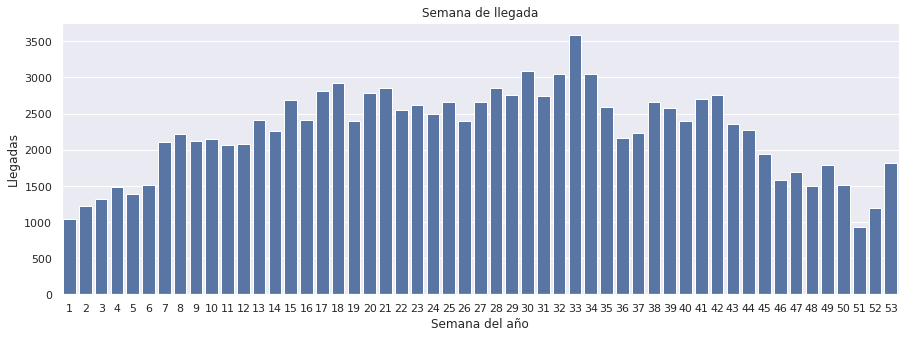

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.set(font_scale=1)
ax = sns.countplot(data=df, x= "arrival_date_week_number", palette= None, color = '#4c72b0')    
ax.set_xlabel('Semana del año')    #label x
ax.set_ylabel('Llegadas')     #label y
ax.set_title('Semana de llegada')  #título       
plt.show()

Las llegadas en cada semana copian en general el patrón de las llegadas en cada mes. En las últimas dos semanas del año se observa un aumento de llegadas, probablemente debido al turismo por los festejos de final de año. La semana 33 registra el mayor número de arribos y la semana 51 el menor. 

### Análisis Bivariado

#### *Tasa de cancelación* 

Se calcula la Tasa de cancelación, para evaluar evolución en el tiempo

Formula de Tasa de cancelación:

\begin{align}
        Churn Rate = \frac{N Clientes Iniciales  - \, N Clientes Finales}{N Clientes Iniciales}*100
    \end{align}

In [ ]:
df_pivot = pd.pivot_table(df.reset_index(), columns=['arrival_date_month', 'arrival_date_year'], 
        index=['is_canceled'],
        values='index',
        aggfunc=len, margins=True, margins_name='subtotales')
df_pivot

arrival_date_month April       August             December       February  \
arrival_date_year   2016  2017   2015  2016  2017     2015  2016     2016   
is_canceled                                                                 
0                   3367  3198   2291  3238  3109     1947  2462     2554   
1                   2061  2463   1598  1825  1816      973  1398     1337   
subtotales          5428  5661   3889  5063  4925     2920  3860     3891   

arrival_date_month       January        July              June       March  \
arrival_date_year   2017    2016  2017  2015  2016  2017  2016  2017  2016   
is_canceled                                                                  
0                   2818    1691  2431  1517  3073  3329  3196  3208  3347   
1                   1359     557  1250  1259  1499  1984  2096  2439  1477   
subtotales          4177    2248  3681  2776  4572  5313  5292  5647  4824   

arrival_date_month         May       November       October       September  \
arrival_date_year   2017  2016  2017     2015  2016    2015  2016      2015   
is_canceled                                                                   
0                   3298  3563  3551     1854  2818    3225  3689      3020   
1                   1672  1915  2762      486  1636    1732  2514      2094   
subtotales          4970  5478  6313     2340  4454    4957  6203      5114   

arrival_date_month       subtotales  
arrival_date_year   2016             
is_canceled                          
0                   3372      75166  
1                   2022      44224  
subtotales          5394     119390

In [ ]:
Tasa_cancelacion = (df_pivot.iloc[2] - df_pivot.iloc[0])/df_pivot.iloc[2]*100

df_cancelacion = pd.DataFrame(Tasa_cancelacion)
df_cancelacion.head()

0
arrival_date_month arrival_date_year        
April              2016               37.970
                   2017               43.508
August             2015               41.090
                   2016               36.046
                   2017               36.873

In [ ]:
df_cancelacion = df_cancelacion.reset_index()        #reseteo el indice
df_cancelacion.rename({0: 'Porcentaje'}, axis=1, inplace=True)   # renombro columna
df_cancel=df_cancelacion.drop(df_cancelacion.index[-1])          # elimino ultima fila que tiene el subtotal (marginal)
df_cancel.tail()

,arrival_date_month,arrival_date_year,Porcentaje
21,November,2016,36.731
22,October,2015,34.940
23,October,2016,40.529
24,September,2015,40.946
25,September,2016,37.486


In [ ]:
df_cancel.replace({"arrival_date_month": mes}, inplace=True)                #reemplazo el mes en texto por numero (definido antes)
df_cancel['date'] = pd.to_datetime({'year':df_cancel['arrival_date_year'],              #creo columna date y la convierto a datetime
                                    'month':df_cancel.arrival_date_month,
                                    'day':1
                                    })
df_cancel = df_cancel.drop(['arrival_date_month', 'arrival_date_year'], axis=1)
df_cancel.head()

,Porcentaje,date
0,37.970,2016-04-01
1,43.508,2017-04-01
2,41.090,2015-08-01
3,36.046,2016-08-01
4,36.873,2017-08-01


In [ ]:
df_cancel.dtypes

Porcentaje           float64
date          datetime64[ns]
dtype: object

In [ ]:
len(df_cancel) # no faltan meses 26 = (12-6)+12+8

26

In [ ]:
df_cancel = df_cancel.sort_values(by='date', ascending=True) 
df_cancel.head()

,Porcentaje,date
11,45.353,2015-07-01
2,41.090,2015-08-01
24,40.946,2015-09-01
22,34.940,2015-10-01
20,20.769,2015-11-01


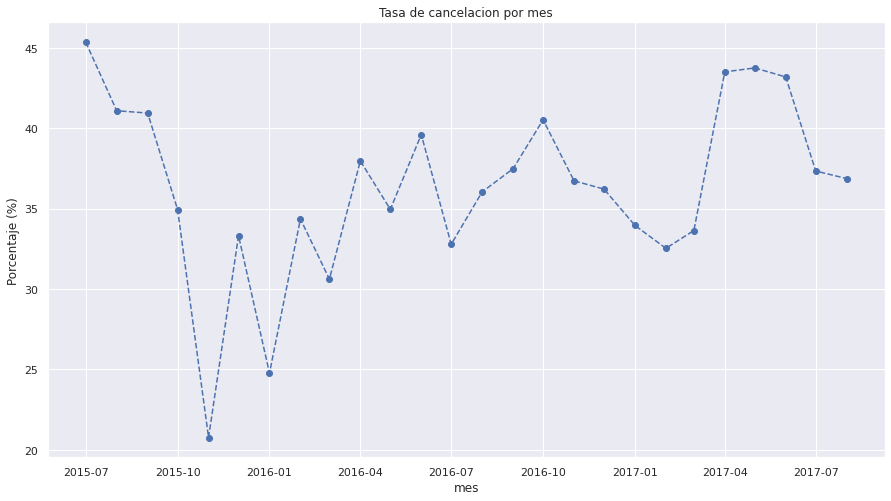

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_cancel['date'], df_cancel['Porcentaje'], marker='o', linestyle='--')
ax.set_title("Tasa de cancelacion por mes")
ax.set_xlabel("mes")
ax.set_ylabel("Porcentaje (%)")
plt.show()

In [ ]:
# Porcentajes mínimo y máximo de cancelación
max_cancel = df_cancel['Porcentaje'].max()
min_cancel = df_cancel['Porcentaje'].min()
print('El porcentaje mínimo de cancelación es: ', min_cancel, ' y el máximo es ', max_cancel)

El porcentaje mínimo de cancelación es:  20.76923076923077  y el máximo es  45.35302593659942


Se calculó la tasa de cancelación de reservas por mes y se graficó para ver variaciones en el tiempo. El porcentaje varió entre el 20% y 45%. El valor más bajo se observa durante el primer año de registro y luego la tasa de cancelación aumenta oscilando entre el 35 y 45%. Este porcentaje de cancelaciones se considera demasiado elevado y resulta perjudicial para el negocio. Se justifica la necesidad planteada anteriormente de desarrollar un modelo de predicción de cancelaciones para optimizar la asignación de habitaciones.

#### *Cancelación (target, categórica) y número de cancelaciones previas (numérica)*

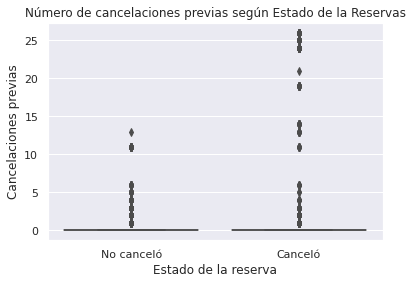

In [ ]:
ax = sns.boxplot(x = "is_canceled", y ="previous_cancellations", data = df) #análisis de variable cuantitativa con categórica
sns.set(font_scale=1)
ax.set_xlabel('Estado de la reserva')
ax.set_xticklabels(labels)
ax.set_ylabel('Cancelaciones previas')     #label y
ax.set_title('Número de cancelaciones previas según Estado de la Reservas')  #título       
plt.show()

Vemos que el número de cancelaciones previas tiene una distribución centrada en cero y tiene un bajo porcentaje de outliers en ambos grupos (ya lo habíamos observado en el análisis univariado). Generamos 3 clases para la variable previous cancelations y realizamos una tabla de contingencia para analizar su comportamiento dentro de is canceled.

In [ ]:
df4 = df.copy()
df4.loc[df['previous_cancellations'] > 1, 'previous_cancellations'] = 2
df4['previous_cancellations'].describe()

count    119390.000
mean          0.058
std           0.249
min           0.000
25%           0.000
50%           0.000
75%           0.000
max           2.000
Name: previous_cancellations, dtype: float64

In [ ]:
pd.crosstab(df4.is_canceled, df4.previous_cancellations, normalize='columns') #genera la tabla de contingencia

previous_cancellations,0,1,2
is_canceled,,,
0,0.661,0.056,0.473
1,0.339,0.944,0.527


Se observa que el comportamiento de las cancelaciones es diferente según si el cliente canceló o no previamente. En clientes que no cancelaron, la probabilidad de no cancelar es el doble que de cancelar. En cambio, en clientes que cancelaron previamente una vez, la probabilidad de cancelar nuevamente es casi 95%. En clientes que cancelaron 2 veces o más, no hay diferencias. La cancelación previa, por lo tanto, sería importante a la hora de predecir si el cliente cancelará o no. 

#### *Cancelación (target, categórica) y longitud de la estadía en días de semana (numérica)*

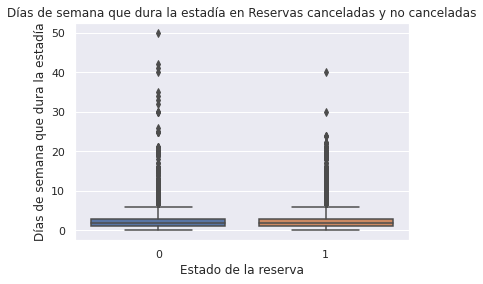

In [ ]:
ax = sns.boxplot(x = "is_canceled", y ="stays_in_week_nights", data = df) #análisis de variable cuantitativa con categórica
sns.set(font_scale=1)
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Días de semana que dura la estadía')     #label y
ax.set_title('Días de semana que dura la estadía en Reservas canceladas y no canceladas')  #título       
plt.show()

Análogamente a lo que ocurre con previous_cancelations, la variable longitud de la estadía en días de semana tiene muchos outliers superiores en ambos grupos. Los agrupamos en una sola categoría para visualizar mejor si hay diferencias en la distribución en ambos grupos más allá de los outliers. 

In [ ]:
df['stays_in_week_nights'].describe()

count    119390.000
mean          2.500
std           1.908
min           0.000
25%           1.000
50%           2.000
75%           3.000
max          50.000
Name: stays_in_week_nights, dtype: float64

El percentil 75% corresponde a 3 noches. A partir de 20 noches comienza a observarse diferencias en los outliers. Realizamos un gráfico de medias y  medianas para observar mejor las diferencias. 

In [ ]:
from numpy import median

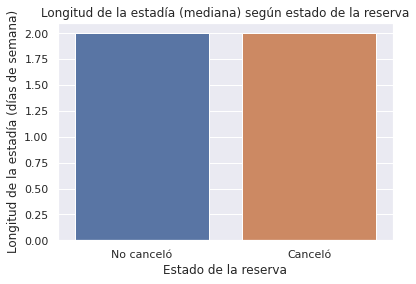

In [ ]:
labels=('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.barplot(x='is_canceled', y='stays_in_week_nights', data=df, estimator = median) #gráfico de barras con las medianas para visualizar mejor la info del boxplot
ax.set_xticklabels(labels)
ax.set_title('Longitud de la estadía (mediana) según estado de la reserva')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Longitud de la estadía (días de semana)')
plt.show()

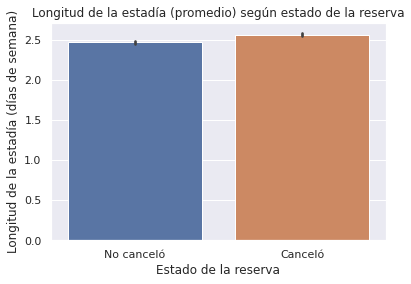

In [ ]:
labels=('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.barplot(x='is_canceled', y='stays_in_week_nights', data=df) #gráfico de barras con las medianas para visualizar mejor la info del boxplot
ax.set_xticklabels(labels)
ax.set_title('Longitud de la estadía (promedio) según estado de la reserva')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Longitud de la estadía (días de semana)')
plt.show()

La mediana y el promedio de la longitud de la estadía en días de semana no estarían relacionadas con la probabilidad de cancelar ya que son similares en ambos grupos. Las estadías muy extensas (mayores a 25 días) estarían asociadas a una baja probabilidad de cancelación (por la información del boxplot).

#### *Cancelación (target, categórica) y tipo de hotel (categórica)*

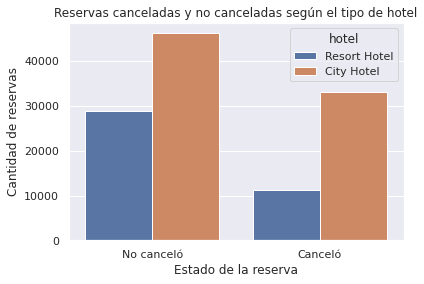

In [ ]:
labels=('No canceló', 'Canceló')
ax = sns.countplot(x = "is_canceled", hue ="hotel", data = df) #análisis de 2 variables categóricas
sns.set(font_scale=1)
ax.set_xticklabels(labels)
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Cantidad de reservas')     #label y
ax.set_title('Reservas canceladas y no canceladas según el tipo de hotel')  #título       
plt.show()

Parece haber diferencias en las cancelaciones por tipo de hotel. Realizamos tabla de contingencia para comprobarlo.

In [ ]:
pd.crosstab(df.is_canceled, df.hotel, normalize='columns') #genera la tabla de contingencia

hotel,City Hotel,Resort Hotel
is_canceled,,
0,0.583,0.722
1,0.417,0.278


Aquí confirmamos que la proporción de cancelaciones es diferentes en el hotel resort que en el urbano. Las cancelaciones son menores (25% a 75%) en el hotel Resort que en el urbano (60%-40%). El tipo de hotel estaría relacionado entonces con la probabilidad de cancelar.

#### *Cancelación (target, categórica) y tipo de depósito (categórica)*

In [ ]:
df.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
df_dep = df.groupby(['is_canceled','deposit_type'])['deposit_type'].count().mul(100)/len(df)
df_dep 

is_canceled  deposit_type
0            No Deposit      62.775
             Non Refund       0.078
             Refundable       0.106
1            No Deposit      24.871
             Non Refund      12.140
             Refundable       0.030
Name: deposit_type, dtype: float64

In [ ]:
df_dep = pd.DataFrame(df_dep)
df_dep.rename({'deposit_type': 'Porcentaje'}, axis=1, inplace=True)   # renombro columna
df_dep = df_dep.reset_index()           #reseteo el indice
df_dep     

,is_canceled,deposit_type,Porcentaje
0,0,No Deposit,62.775
1,0,Non Refund,0.078
2,0,Refundable,0.106
3,1,No Deposit,24.871
4,1,Non Refund,12.140
5,1,Refundable,0.030


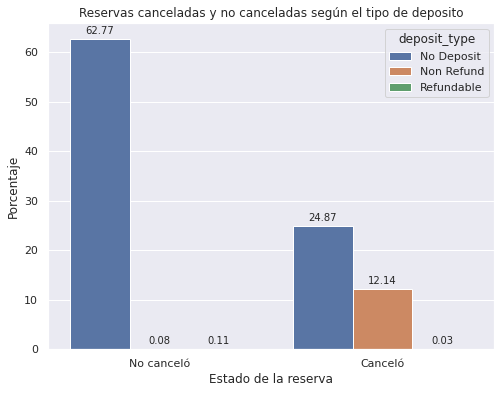

In [ ]:
plt.figure(figsize=(8, 6)) 
labels=('No canceló', 'Canceló')
ax = sns.barplot(x='is_canceled', y='Porcentaje', hue = "deposit_type", data=df_dep)

for bar in ax.patches:                       # se agrega info de cada barra
    ax.annotate(format(bar.get_height(), '.2f'),  # 2 decimales
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points') 


ax.set_xticklabels(labels)
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Porcentaje')     #label y
ax.set_title('Reservas canceladas y no canceladas según el tipo de deposito')  #título       
plt.show()

Dentro del grupo que No canceló, prácticamente la mayoría fueron reservas Sin depósito. Dentro del grupo que Canceló, hubo reservas Sin depósito y reservas Sin reembolso. Hubiéramos esperado que las reservas No reembolsables fueran más frecuentes dentro del grupo que No canceló, pero ocurrió lo opuesto. Como la proporción de tipo de depósito dentro de cada grupo es diferente, el tipo de depósito podría estar relacionado con la variable target. 

#### *Cancelación (target, categórica) y mes de arribo (categórica)*

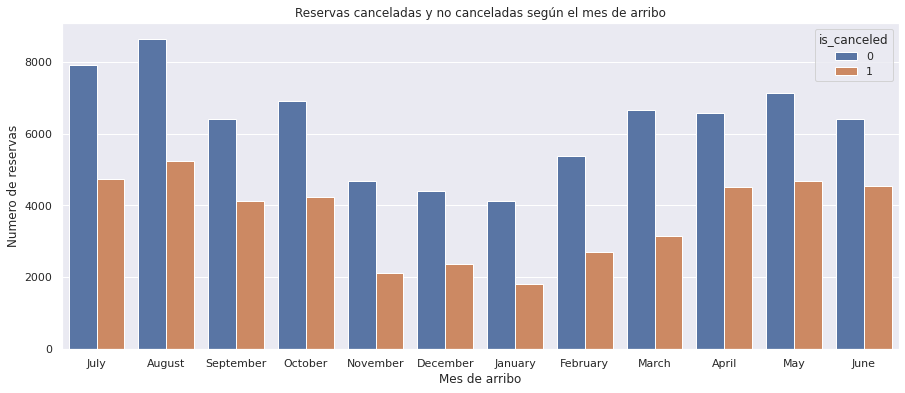

In [ ]:
fig, ax = plt.subplots(figsize=(15,6)) #da info similar al de frecuencias relativas
sns.set(font_scale=1)
ax = sns.countplot('arrival_date_month', data=df, hue='is_canceled')
ax.set_xlabel('Mes de arribo')
ax.set_ylabel('Numero de reservas')     #label y
ax.set_title('Reservas canceladas y no canceladas según el mes de arribo')  #título       
plt.show()

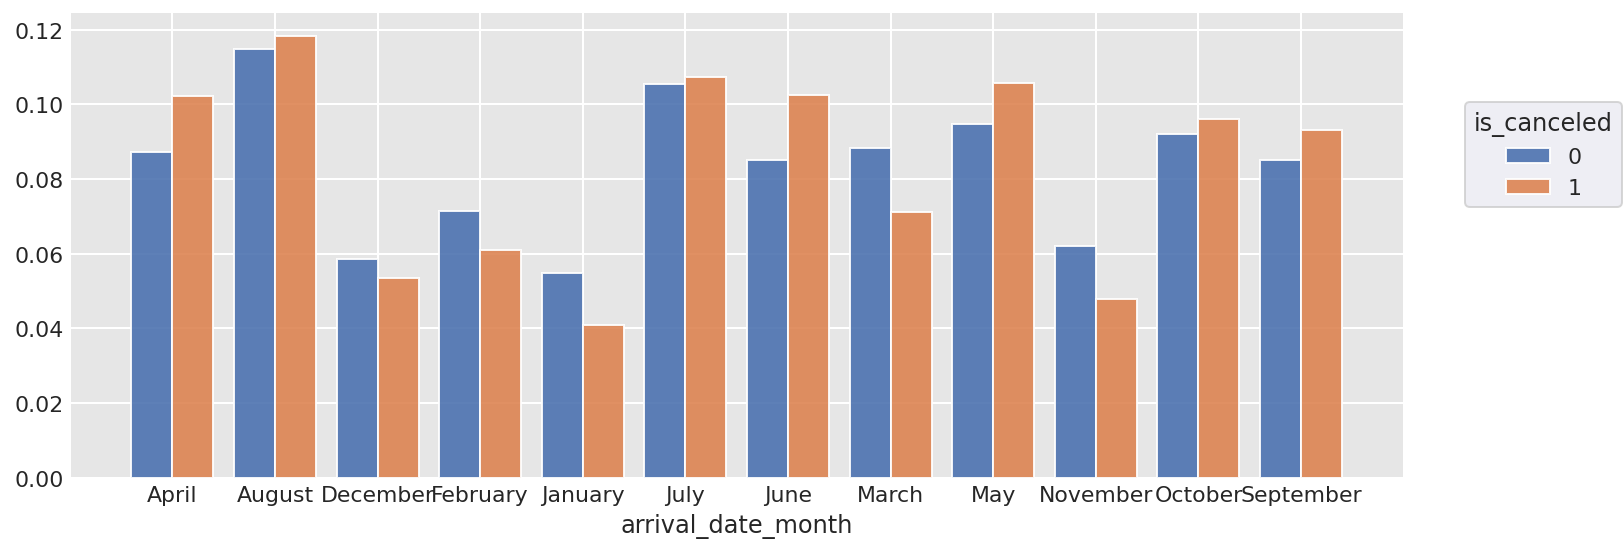

In [ ]:
dxp.count("arrival_date_month", data=df, split="is_canceled", normalize='is_canceled', size=0.8, 
          figsize=(10,4), cmap=["#4c72b0","#dd8452"],bar_kwargs={"ec":"white"})

En algunos meses (abril, junio, mayo y septiembre) aumenta la proporción de reservas canceladas. El mes, por lo tanto, podría estar relacionado con la probabilidad de cancelar. Para verlo de forma más detallada, realizamos el análisis por semana.

#### *Cancelación (target, categórica) y semana de arribo (categórica)*

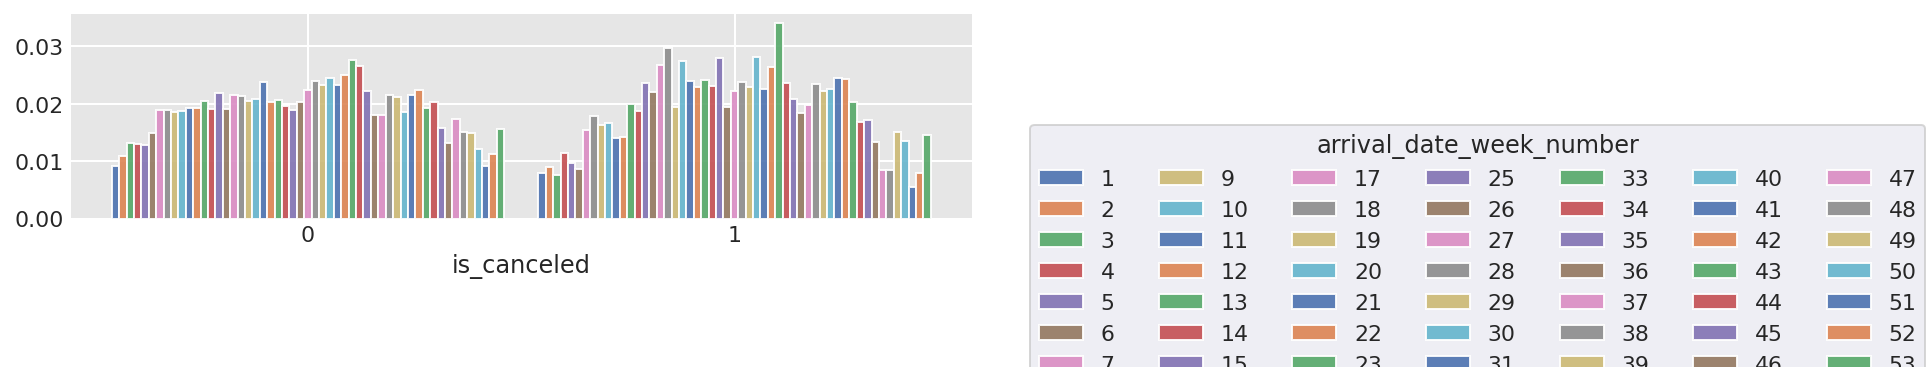

In [ ]:
dxp.count("is_canceled", data=df, split="arrival_date_week_number", normalize='is_canceled', 
          cmap=['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd'],
          bar_kwargs={"ec":"white"})

En el gráfico de barras se observa un comportamiento similar de semanas de arribo en ambos grupos, pero algunas reservas tiene más probabilidad de ser canceladas en ciertas semanas del año. Para ver mejor cuáles son esas semanas realizamos el gráfico de otra forma: 

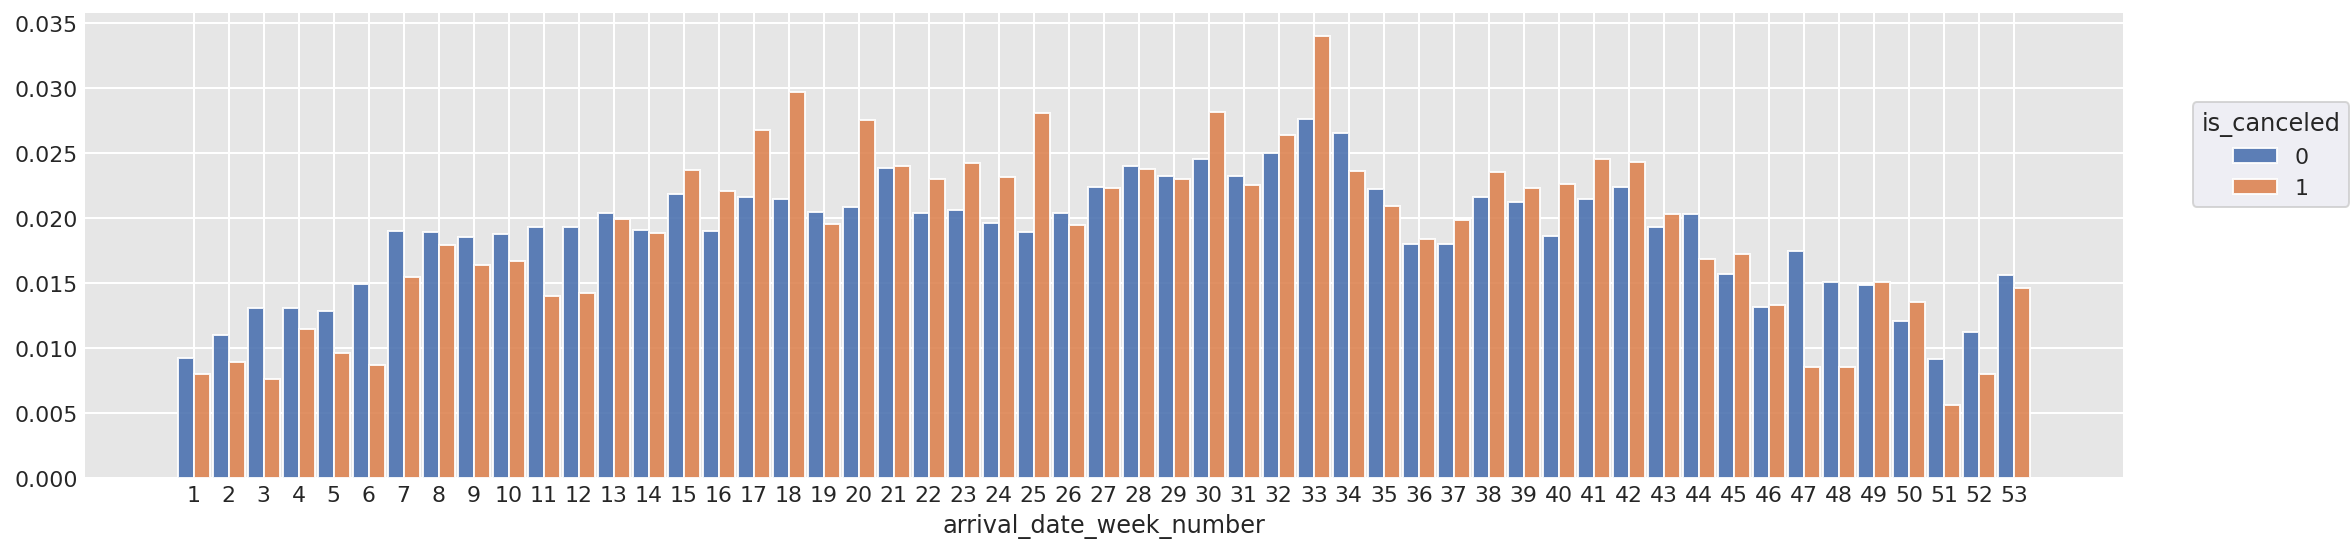

In [ ]:
dxp.count('arrival_date_week_number', data=df, split='is_canceled', normalize='is_canceled', figsize=(15,4), cmap=["#4c72b0","#dd8452"],bar_kwargs={"ec":"white"}) 

En este gráfico de barras se observa que algunas semanas (ej. 17, 18, 20, 25, 30, 33) el comportamiento de las cancelaciones es diferente. La semana de arribo, por lo tanto, podría estar relacionada con las cancelaciones.

#### *Cancelación (target, categórica) y Tipo de cliente (categórica)*

In [ ]:
df_custom = pd.crosstab(df.is_canceled, df.customer_type, normalize='columns')      # puebo con dos variables
df_custom

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,0.69,0.898,0.593,0.746
1,0.31,0.102,0.407,0.254


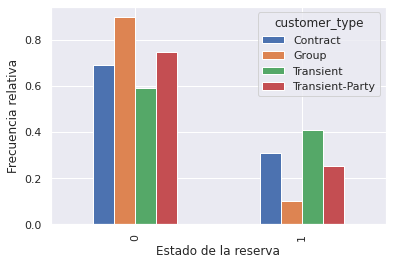

In [ ]:
df_custom.plot(kind='bar', stacked=False, color =['#4c72b0', '#dd8452', '#55a868', '#c44e52']) 
ax.set(facecolor = "grey")
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

Se pueden ver diferencias respecto a los distintos tipos/segmentos de clientes. En el caso de segmentos grupales se observa un porcentaje muy bajo de cancelación respecto a los otros segmentos. 

#### *Cancelación (target, categórica) y Tipo de de habitacion (categórica)*

In [ ]:
df2 = df.copy() #genera una copia del df original para generar una nueva variable "Cambio de habitación reservada"
df2.loc[df2.assigned_room_type!=df2.reserved_room_type, 'Cambio_hab_reservada'] = "Otra habitacion" # en las filas donde la habitación reservada es distinta de la asignada, consignamos el cambio como "Cambio de habitación"
df2.Cambio_hab_reservada.fillna("Misma habitacion", inplace = True) #en las filas donde no hubo cambio de habitación, colocamos "Misma habitación"

df3= pd.crosstab(df2.is_canceled, df2.Cambio_hab_reservada, normalize='columns') #genera la tabla de contingencia
df3

Cambio_hab_reservada,Misma habitacion,Otra habitacion
is_canceled,,
0,0.584,0.946
1,0.416,0.054


In [ ]:
type(df3)

pandas.core.frame.DataFrame

In [ ]:
df3.shape

(2, 2)

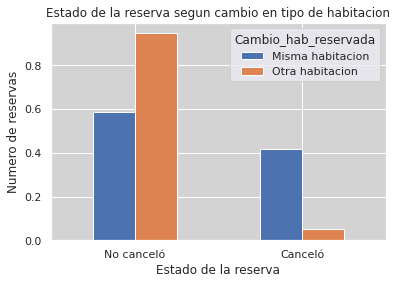

In [ ]:
labels = ('No canceló', 'Canceló')
ax = df3.plot(kind='bar', stacked=False, color=['#4c72b0', '#dd8452']) 
ax.set(facecolor = "lightgrey")
ax.set_xticklabels(labels)
ax.tick_params(axis='x', labelrotation = 0)
ax.set_xlabel('Estado de la reserva')     #label x
ax.set_ylabel('Numero de reservas')     #label y
ax.set_title('Estado de la reserva segun cambio en tipo de habitacion')  #título
plt.grid(color = 'w')         
plt.show()

Si evaluamos las variables "Habitación reservada" y "Habitación asignada" respecto a la cancelacion de la reserva, se observa un número muy bajo de cancelaciones cuando la habitación asignada fue cambiada. Respecto a las reservas que mantienen la misma habitación reservada, el porcentaje de cancelacion o no es similar. Aqui podriamos inferir que ante un cambio de habitación se realizan menos cancelaciones.

#### *Cancelación (target, categórica) y Pais (categórica)*

In [ ]:
cantidad = df.country.value_counts()
cantidad

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

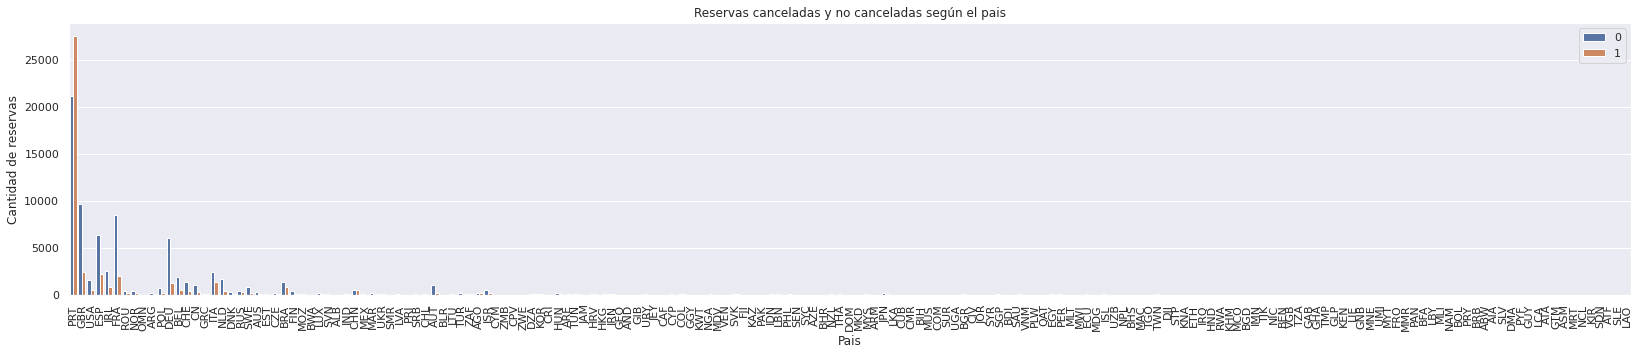

In [ ]:
plt.figure(figsize= (28,5))
ax = sns.countplot(x = "country", hue ="is_canceled", data = df) #análisis de 2 variables categóricas
sns.set(font_scale=1)
plt.xticks(rotation='vertical')
ax.set_xlabel('Pais')
ax.set_ylabel('Cantidad de reservas')     #label y
ax.set_title('Reservas canceladas y no canceladas según el pais')  #título 
plt.legend(loc='upper right')      
plt.show()

El dataframe cuenta con reservas de una gran cantidad de paises (177), siendo el predominante Portugal, seguidos por otros países europeos y Estados Unidos. La mayor proporción de cancelaciones proviene de Portugal, mientras que para el resto de los países en general la proporción de cancelaciones es menor que de no cancelaciones.

In [ ]:
# agrupacion de reservas por pais y estado de la reserva. Ademas se ordena de forma descendente.
country = df.groupby(['is_canceled','country'])['country'].count().mul(100)/len(df)
country.sort_values(ascending=False)

is_canceled  country
1            PRT        2.305e+01
0            PRT        1.765e+01
             GBR        8.105e+00
             FRA        7.104e+00
             ESP        5.353e+00
                          ...    
             LCA        8.376e-04
1            LIE        8.376e-04
             CRI        8.376e-04
0            KIR        8.376e-04
1            ETH        8.376e-04
Name: country, Length: 292, dtype: float64

En esta agrupación se puede ver que el mayor porcentaje de Cancelaciones y no cancelaciones que se visualiza en el gráfico anterior corresponde al pais Portugal. El dataset tiene información de hoteles de Portugal, por lo tanto el mayor número de cancelaciones se dan en turistas del mismo pais. Turistas de otros países presentan un porcentaje de cancelaciones muy bajo. 

In [ ]:
import heapq

In [ ]:
print(heapq.nlargest(20, cantidad))         # veo los 20 primeros o mas grandes para decidir a partir de cual es representativo. 

[48590, 12129, 10415, 8568, 7287, 3766, 3375, 2342, 2224, 2104, 2097, 1730, 1279, 1263, 1024, 999, 919, 669, 632, 607]


#### *Cancelación (target, categórica) y Segmento de mercado (categórica)*

In [ ]:
df.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

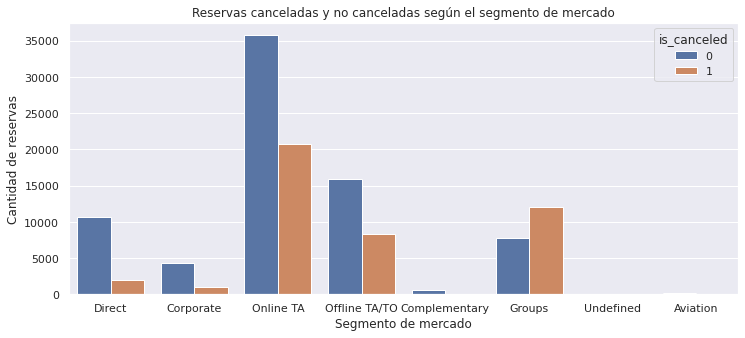

In [ ]:
plt.figure(figsize= (12,5))
ax = sns.countplot(x = "market_segment", hue ="is_canceled", data = df) #análisis de 2 variables categóricas
sns.set(font_scale=1)
ax.set_xlabel('Segmento de mercado')
ax.set_ylabel('Cantidad de reservas')     #label y
ax.set_title('Reservas canceladas y no canceladas según el segmento de mercado')  #título       
plt.show()

La mayor cantidad de reservas se realizan a través de portales online de operadores turísticos. El número de cancelaciones tambien predomina en este segmento. 

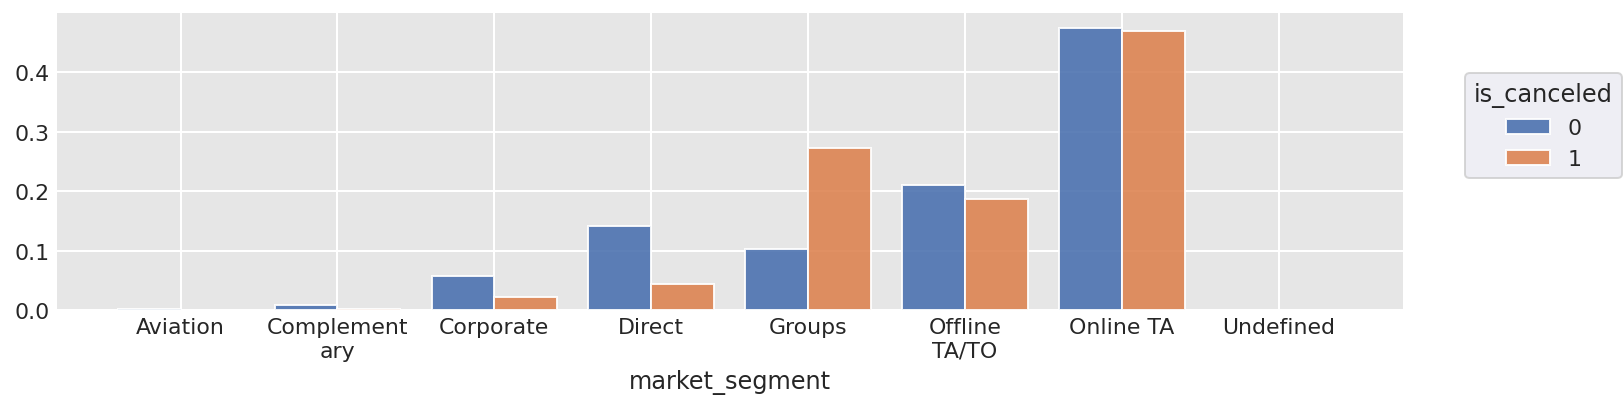

In [ ]:
#relativizamos al peso de cada grupo (Canceló/No canceló).
dxp.count('market_segment', data=df, split='is_canceled', normalize='is_canceled',  size=0.8, figsize=(10,3), cmap=["#4c72b0","#dd8452"],bar_kwargs={"ec":"white"} )

Al realizar el gráfico de barras de frecuencia relativa normalizado por los porcentajes de cancelación dentro de cada grupo, se observa que las reservas realizadas a través de operadores turísticos tanto online como offline tienen porcentajes similares de cancelación. En los segmentos de reservas corporativas y directas, las probabilidad de no cancelar es mayor que la de cancelar. En las reservas de grupos, este patrón se invierte y la probabilidad de cancelar es mayor que de no cancelar. 

#### *Cancelación (target, categórica) y Cambios en la reserva (cuantitativa)*

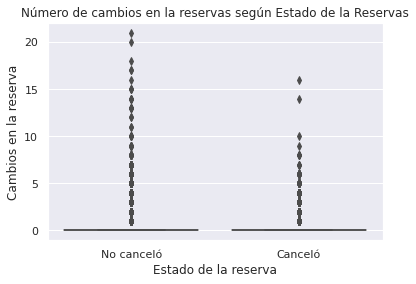

In [ ]:
ax = sns.boxplot(x = "is_canceled", y ="booking_changes", data = df) #análisis de variable cuantitativa con categórica
sns.set(font_scale=1)
ax.set_xlabel('Estado de la reserva')
ax.set_xticklabels(labels)
ax.set_ylabel('Cambios en la reserva')     #label y
ax.set_title('Número de cambios en la reservas según Estado de la Reservas')  #título       
plt.show()

In [ ]:
df['booking_changes'].describe()

count    119390.000
mean          0.221
std           0.652
min           0.000
25%           0.000
50%           0.000
75%           0.000
max          21.000
Name: booking_changes, dtype: float64

La variable cambios en la reserva tiene muchos outliers superiores en ambos grupos. En la mayoria de los casos, no se registran cambios en la reserva. Aunque se puede ver un número menor de cambios en las reservas canceladas. Se realiza un barplot para verlo mejor.

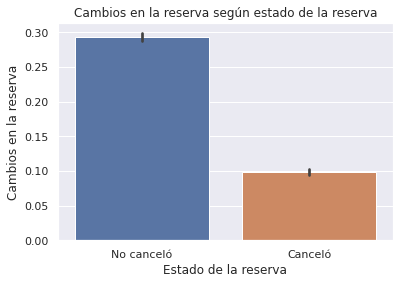

In [ ]:
labels=('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.barplot(x='is_canceled', y='booking_changes', data=df) #gráfico de barras con las medianas para visualizar mejor la info del boxplot
ax.set_xticklabels(labels)
ax.set_title('Cambios en la reserva según estado de la reserva')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Cambios en la reserva')
plt.show()

En promedio, se registra un número mayor de cambios en las reservas de clientes que no cancelaron respecto a clientes que cancelaron.

#### *Cancelación (target, categórica) y Dias en lista de espera (numerica)*

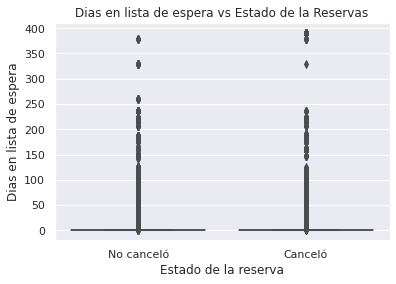

In [ ]:
ax = sns.boxplot(x = "is_canceled", y ="days_in_waiting_list", data = df) #análisis de variable cuantitativa con categórica
sns.set(font_scale=1)
ax.set_xlabel('Estado de la reserva')
ax.set_xticklabels(labels)
ax.set_ylabel('Dias en lista de espera')     #label y
ax.set_title('Dias en lista de espera vs Estado de la Reservas')  #título       
plt.show()

In [ ]:
df['days_in_waiting_list'].describe()

count    119390.000
mean          2.321
std          17.595
min           0.000
25%           0.000
50%           0.000
75%           0.000
max         391.000
Name: days_in_waiting_list, dtype: float64

En funcion al boxplot no parece haber mucha diferencia entre el estado de la reserva y los días en espera hasta la confirmación. Se ven agrupados mucha cantidad de datos en pocos días (alrededor de 2 días) y algunos valores "outliers" que inclusive parece ser un número demasiado grande de días.

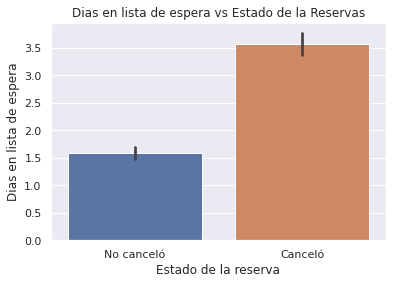

In [ ]:
labels=('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.barplot(x='is_canceled', y='days_in_waiting_list', data=df) #gráfico de barras con las medianas para visualizar mejor la info del boxplot
ax.set_xticklabels(labels)
ax.set_title('Dias en lista de espera vs Estado de la Reservas')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Dias en lista de espera')
plt.show()

Los clientes que cancelaron la reserva estuvieron en promedio más tiempo en lista de espera que los clientes que no cancelaron. 

### Análisis Multivariado 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  object        
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### *Análisis de correlación entre variables cuantitativas según 'is canceled' (categórica)*

In [ ]:
df_cuanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   stays_in_weekend_nights         119390 non-null  int64  
 2   stays_in_week_nights            119390 non-null  int64  
 3   adults                          119390 non-null  int64  
 4   children                        119386 non-null  float64
 5   babies                          119390 non-null  int64  
 6   previous_cancellations          119390 non-null  int64  
 7   previous_bookings_not_canceled  119390 non-null  int64  
 8   booking_changes                 119390 non-null  int64  
 9   days_in_waiting_list            119390 non-null  int64  
 10  adr                             119390 non-null  float64
 11  required_car_parking_spaces     119390 non-null  int64  
 12  total_of_special

In [ ]:
iscanc = df['is_canceled'] #como la variable target es de tipo objeto, la sacó del dataset df_cuanti pero la necesitamos así que la volvemos a agregar
iscanc

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: object

In [ ]:
df_cuanti["is_canceled"] = iscanc #la agregamos nuevamente y chequeamos que se agregó
df_cuanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   stays_in_weekend_nights         119390 non-null  int64  
 2   stays_in_week_nights            119390 non-null  int64  
 3   adults                          119390 non-null  int64  
 4   children                        119386 non-null  float64
 5   babies                          119390 non-null  int64  
 6   previous_cancellations          119390 non-null  int64  
 7   previous_bookings_not_canceled  119390 non-null  int64  
 8   booking_changes                 119390 non-null  int64  
 9   days_in_waiting_list            119390 non-null  int64  
 10  adr                             119390 non-null  float64
 11  required_car_parking_spaces     119390 non-null  int64  
 12  total_of_special

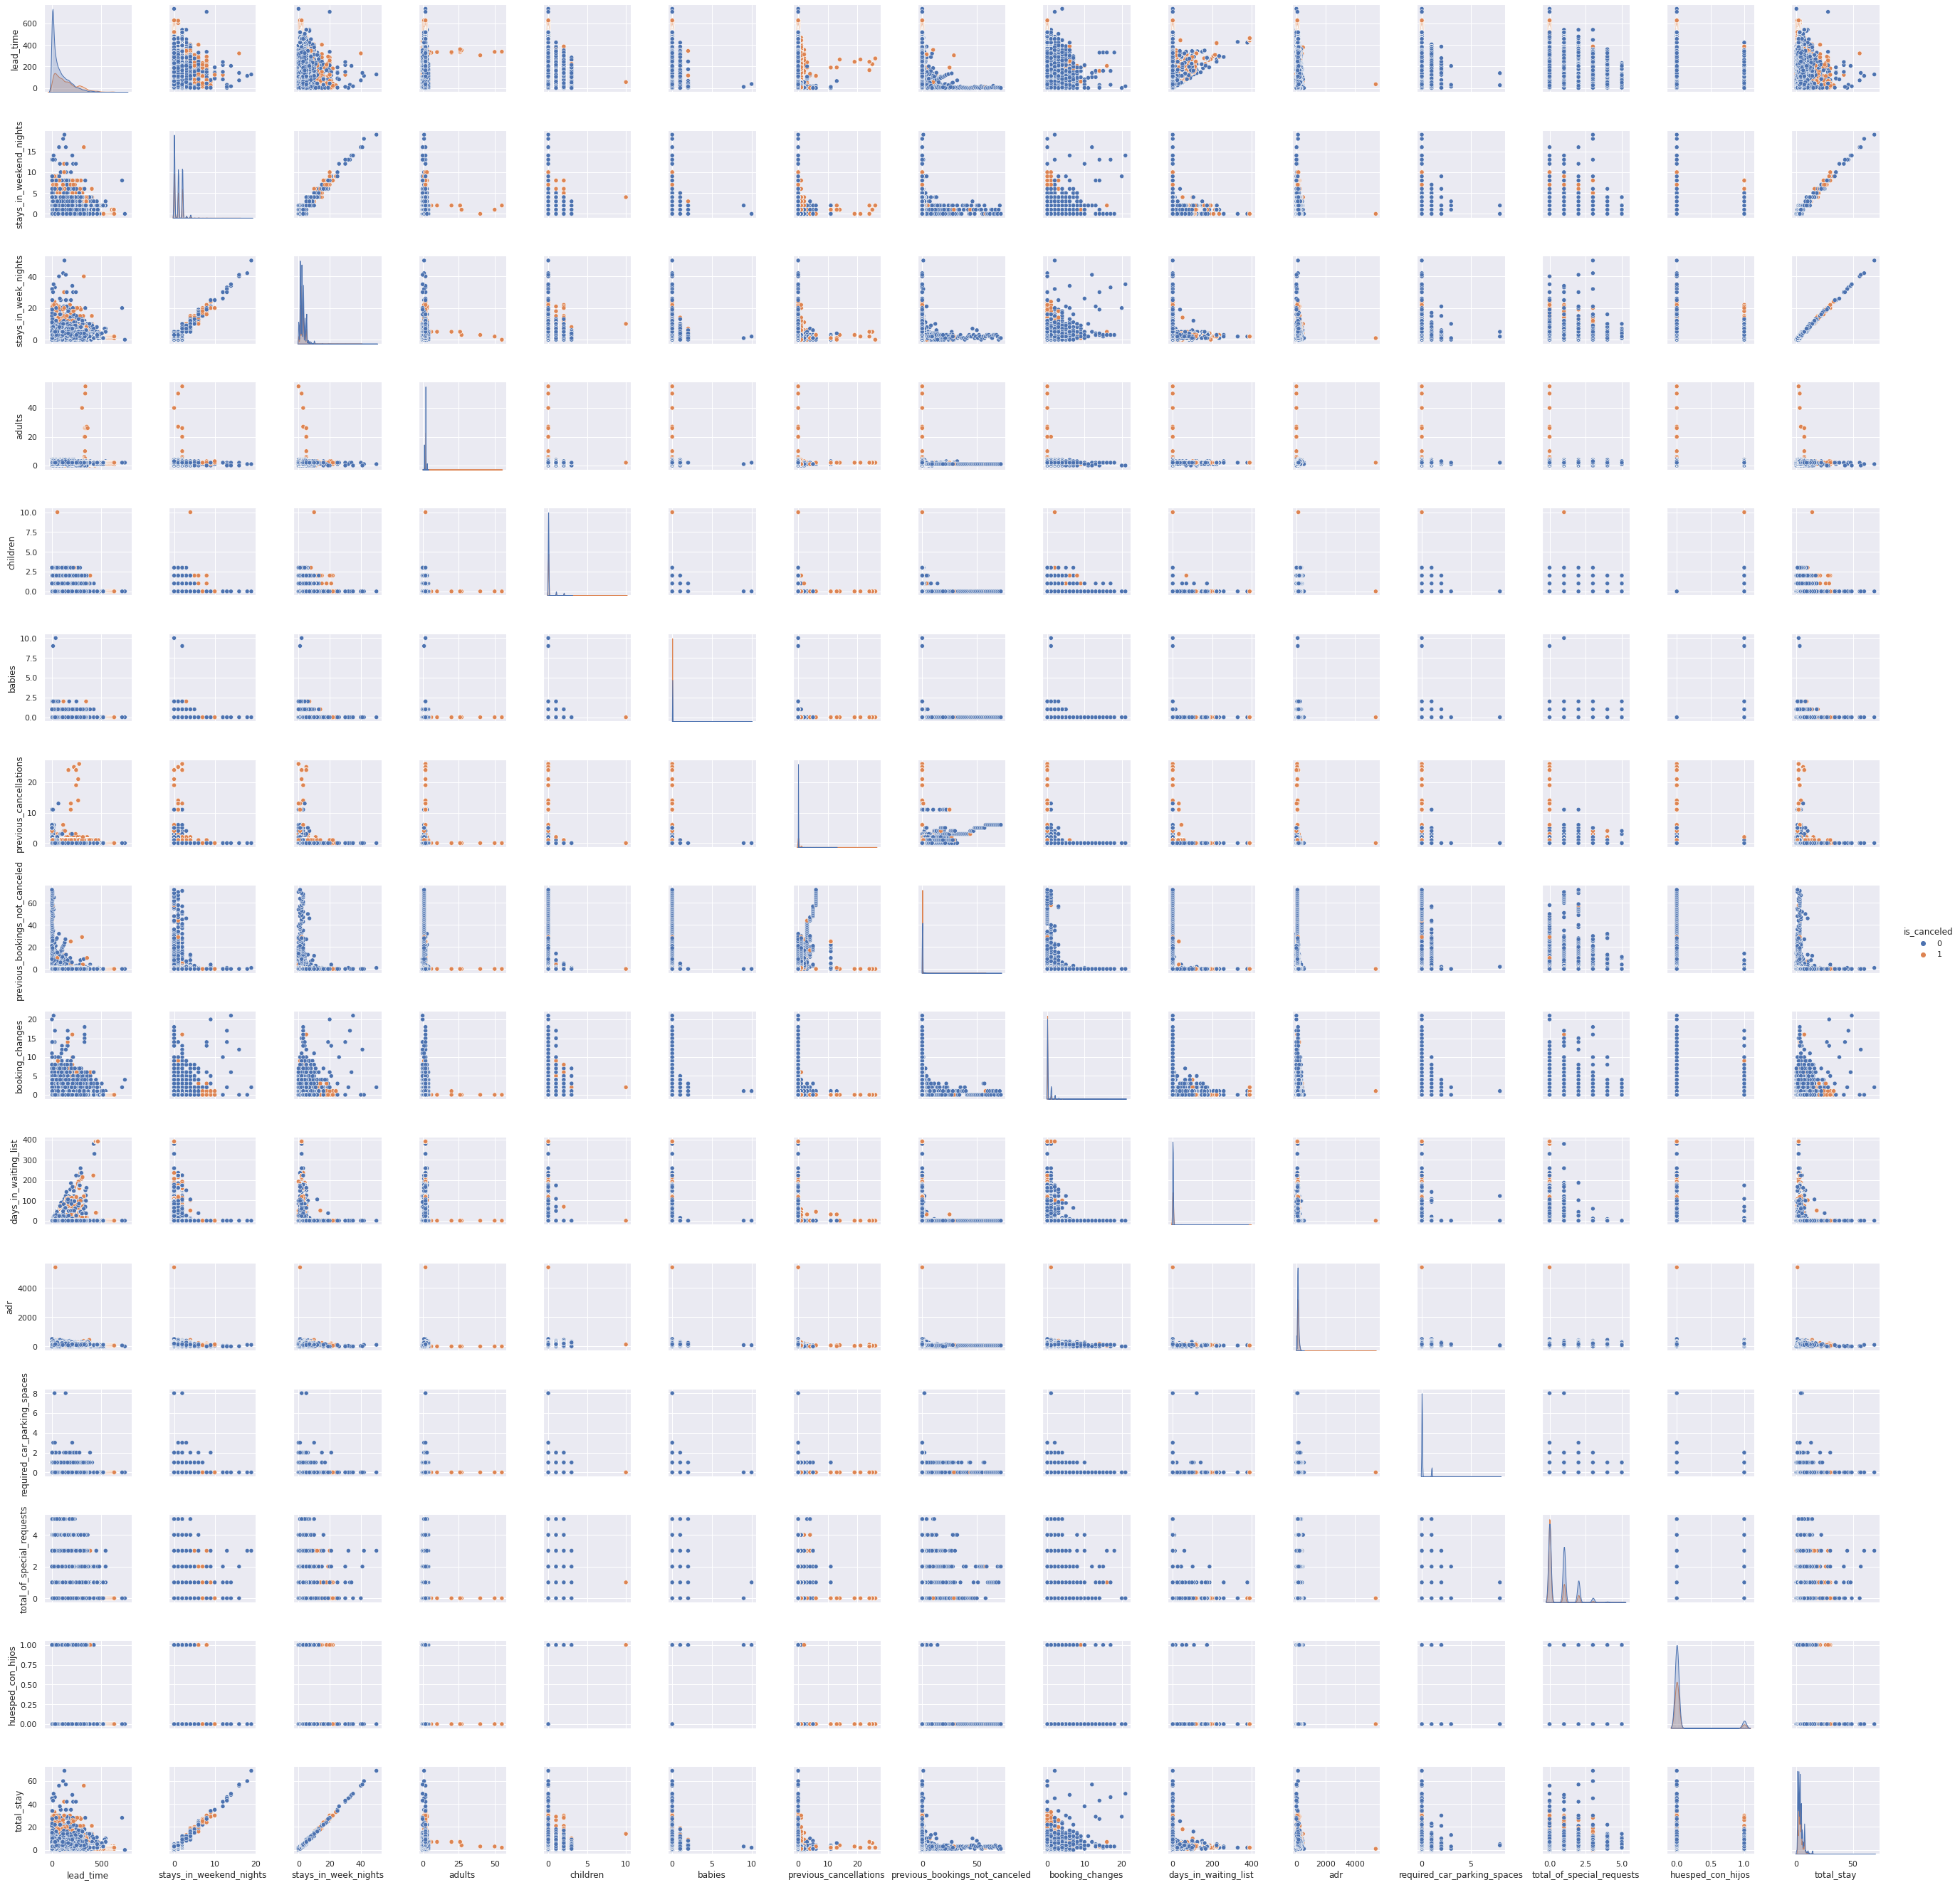

In [ ]:
sns.pairplot(df_cuanti, hue='is_canceled')

Algunas observaciones de la grilla de correlaciones:
- la variable "lead" se distribuye de forma diferente en los grupos Canceló/No canceló. Se podría profundizar ahí.
- la variable "adults" presenta dos nubes de puntos bien diferenciadas entre Canceló y No canceló. Se profundiza en ella a continuación.
- la variable "previous cancellations" también presenta comportamiento distinto entre ambos grupos.
- la variable "days in waiting list" parece presentar valores más altos para el grupo que Canceló.
- para el resto de las variables es más difícil visualizar las diferencias entre el grupo que canceló y que no canceló. Se profundiza en una de ellas ('stays_in_week_days') a continuación. 




#### *Variable "lead" (cuantitativa) y "hotel" vs estado de la reserva*

El lead time –o tiempo de ciclo, de entrega o de suministro– hace referencia al tiempo que discurre desde que se genera una orden de pedido a un proveedor hasta que se entrega la mercancía de ese proveedor al cliente. Sería el tiempo entre que el cliente hace la reserva por primera vez y se cierra la transacción (se efectiviza la reserva o se cancela).

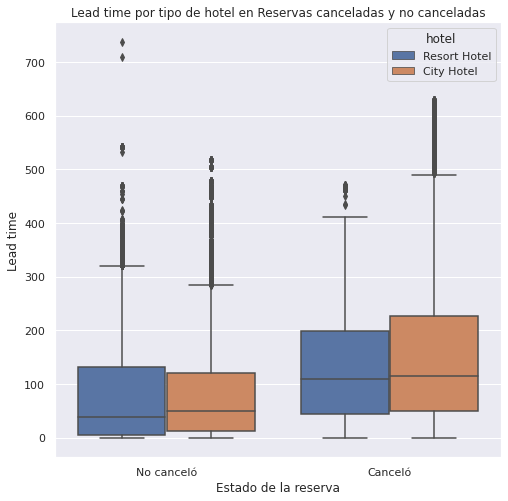

In [ ]:
plt.figure(figsize=(8,8))
labels=('No canceló', 'Canceló')
ax = sns.boxplot(x = "is_canceled", y ='lead_time', hue = 'hotel', data = df) #análisis de variable cuantitativa con categórica
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Lead time') 
ax.set_xticklabels(labels)    #label y
ax.set_title('Lead time por tipo de hotel en Reservas canceladas y no canceladas')  #título       
plt.show()

Las distribuciones de "lead time" dentro del grupo que Canceló son más extendidas que las del grupo que No canceló. Esto indicaría que el tiempo de transacción es más largo con los clientes que cancelan. Utilizamos gráficos de estimadores de posición para explorar mejor.

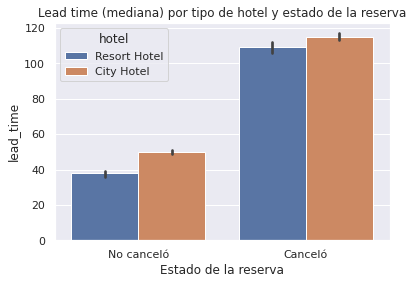

In [ ]:
labels=('No canceló', 'Canceló')
ax = sns.barplot(x='is_canceled', y='lead_time', hue = "hotel", data=df, estimator = median)   #gráfico de barras con las medianas para visualizar mejor la info del boxplot
ax.set_xticklabels(labels)
ax.set_title('Lead time (mediana) por tipo de hotel y estado de la reserva')
ax.set_xlabel('Estado de la reserva')
plt.show()

Dentro del grupo que Canceló, la mediana del lead time es superior a la del grupo que No canceló. No parece haber diferencias por tipo de hotel. 

#### *Variable "adults" (cuantitativa) y "hotel" (categórica) vs estado de la reserva*

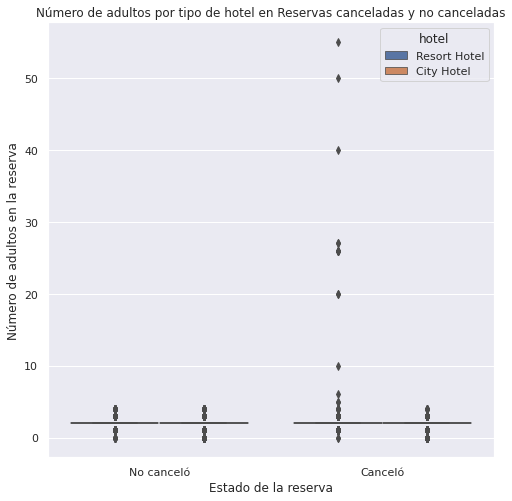

In [ ]:
plt.figure(figsize=(8,8))
labels=('No canceló', 'Canceló')
ax = sns.boxplot(x = "is_canceled", y ='adults', hue = 'hotel', data = df) #análisis de variable cuantitativa con categórica
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Número de adultos en la reserva') 
ax.set_xticklabels(labels)    #label y
ax.set_title('Número de adultos por tipo de hotel en Reservas canceladas y no canceladas')  #título       
plt.show()

Las cajas están colapsadas porque el rango de la variable es muy pequeño y el gráfico no resulta de gran utilidad, sólo sirve para visualizar que el grupo Canceló-Resort hotel presenta muchos outliers hacia números grandes de adultos (contingentes, probablemente). Utilizamos estimadores de posición para explorar mejor.

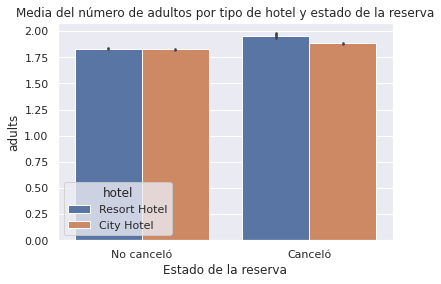

In [ ]:
labels=('No canceló', 'Canceló')
ax = sns.barplot(x='is_canceled', y='adults', hue = "hotel", data=df) #gráfico de barras con las medias para visualizar mejor la info del boxplot
ax.set_xticklabels(labels)
ax.set_title('Media del número de adultos por tipo de hotel y estado de la reserva')
ax.set_xlabel('Estado de la reserva')
plt.show()

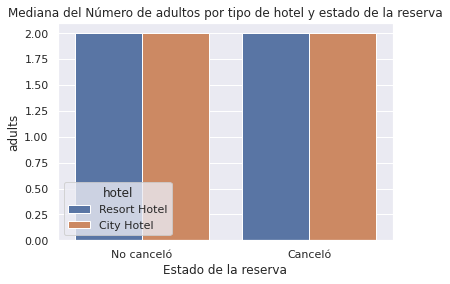

In [ ]:
labels=('No canceló', 'Canceló')
ax = sns.barplot(x='is_canceled', y='adults', hue = "hotel", data=df, estimator = median)  #gráfico de barras con las medianas para visualizar mejor la info del boxplot
ax.set_xticklabels(labels)
ax.set_title('Mediana del Número de adultos por tipo de hotel y estado de la reserva')
ax.set_xlabel('Estado de la reserva')
plt.show()

En base al gráfico de las medianas, no hay diferencias en el número de adultos en los 4 subgrupos analizados. El gráfico de medias muestra que el promedio de adultos es levemente superior dentro del subgrupo Canceló-Resort hotel pero eso se debe al mayor número de outliers superiores visto en el boxplot. Podría pensarse entonces cuando el número de adultos es cercano a 2, la probabilidad de cancelación es similar en todos los casos analizados. En cambio, cuando las reservas son para contingentes grandes (más de 10 adultos) y hoteles resort, tienen mayor probabilidad de cancelarse. 

#### *Variable "previous_cancellations" con estado de la reserva y régimen de comidas*

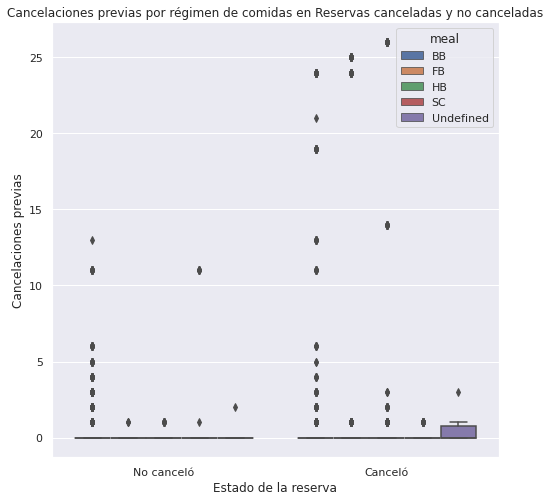

In [ ]:
plt.figure(figsize=(8,8))
labels=('No canceló', 'Canceló')
ax = sns.boxplot(x = "is_canceled", y ='previous_cancellations', hue = 'meal', data = df) #análisis de variable cuantitativa con categórica
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Cancelaciones previas') 
ax.set_xticklabels(labels)    #label y
ax.set_title('Cancelaciones previas por régimen de comidas en Reservas canceladas y no canceladas')  #título       
plt.show()

En general el grupo que Canceló tuvo mayor número de cancelaciones previas. Como las cajas están colapsadas cerca de cero, utilizamos otro gráfico para visualizar (medias y medianas).

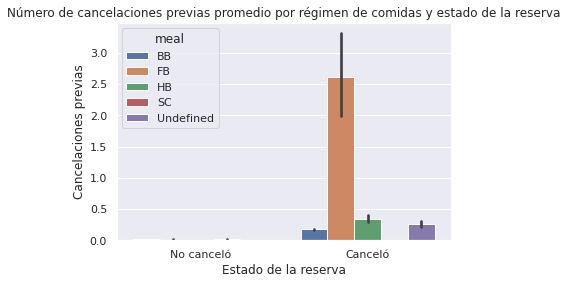

In [ ]:
labels=('No canceló', 'Canceló')
ax = sns.barplot(x='is_canceled', y='previous_cancellations', hue = "meal", data=df) #gráfico de barras con las medias para visualizar mejor la info del boxplot
ax.set_xticklabels(labels)
ax.set_title('Número de cancelaciones previas promedio por régimen de comidas y estado de la reserva')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Cancelaciones previas')
plt.show()

La media de las cancelaciones previas es mayor dentro del grupo que Canceló, y dentro de éste, la mayor probabilidad de cancelar se asocia al régimen de pensión completa (FB). 

#### *Variable "stays_in_week_nights" (cuantitativa) y "hotel" (categórica)  vs estado de la reserva*

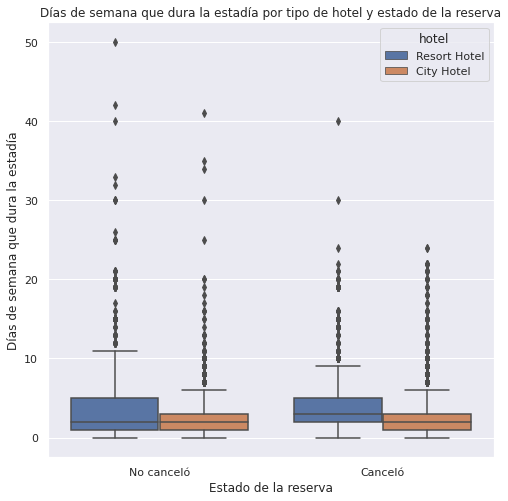

In [ ]:
plt.figure(figsize= (8,8))
ax = sns.boxplot(x = "is_canceled", y ='stays_in_week_nights', hue = 'hotel', data = df) #análisis de variable cuantitativa con categórica
ax.set_xlabel('Estado de la reserva')  
ax.set_xticklabels(["No canceló","Canceló"])
ax.set_title('Días de semana que dura la estadía por tipo de hotel y estado de la reserva')
ax.set_ylabel('Días de semana que dura la estadía')
plt.show()

A primera vista la distribución del subgrupo No canceló-Resort hotel está levemente más desplazada hacia arriba que la del subgrupo Canceló-Resort, sugiriendo que las estadías son levemente más largas en el primero que en el segundo. Las estadías en hoteles urbanos es similar dentro de No canceló y Canceló. Igualmente, como el rango intercuartílico es pequeño, es díficil visualizarlo. Con respecto a los outliers, el grupo que No canceló presenta en general más outliers hacia estadias largas que el grupo Canceló. 

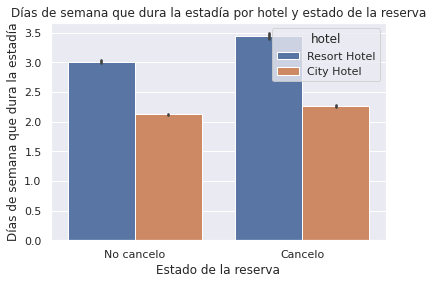

In [ ]:
labels=('No cancelo', 'Cancelo')
ax = sns.barplot(x='is_canceled', y='stays_in_week_nights', hue = "hotel", data=df) #gráfico de barras con las medias para visualizar mejor la info del boxplot
ax.set_xticklabels(labels)
ax.set_title('Días de semana que dura la estadía por hotel y estado de la reserva')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Días de semana que dura la estadía')
plt.show()

En concordancia con lo visto en el boxplot, la media de las estadías dentro del subgrupo Canceló-Resort hotel es superior a la del subgrupo No canceló-Resort hotel, y ambas son superiores a las estadías en hoteles urbanos. Las medias de las estadías en hoteles urbanos es similar entre No canceló-Canceló.

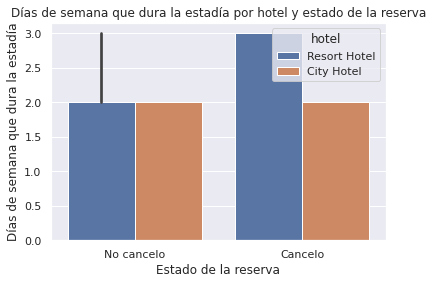

In [ ]:
labels=('No cancelo', 'Cancelo')
ax = sns.barplot(x='is_canceled', y='stays_in_week_nights', hue = "hotel", data=df, estimator=median) #realizamos 
ax.set_xticklabels(labels)
ax.set_title('Días de semana que dura la estadía por hotel y estado de la reserva')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Días de semana que dura la estadía')
plt.show()


Análogamente, la mediana de la estadía dentro del grupo Canceló-Resort hotel es mayor que las medianas de todos los otros subgrupos. Este análisis indicaría que las reservas de estadías largas en hoteles resort tienen mayor tendencia a ser canceladas que el resto. A su vez, los hoteles tipo Resort suelen tener régimen de pensión completa, lo que explicaría el mayor porcentaje de cancelaciones observado en el análisis anterior que incluía la variable 'meal'.

#### *Variable "deposit_type" y "customer_type" vs estado de la reserva (todas categoricas)* 

In [ ]:
df_pivot = pd.pivot_table(df.reset_index(), columns=['deposit_type', 'customer_type'], 
        index=['is_canceled'],
        values='index',
        fill_value = 0,                #relleno con ceros donde no hay coincidencias en la combinacion
        aggfunc = len)                   # el arg por defecto es mean, pero queremos contar cuantos ids hay -> entonces aggfunc = len
df_pivot                                

deposit_type  No Deposit                                 Non Refund            \
customer_type   Contract Group Transient Transient-Party   Contract Transient   
is_canceled                                                                     
0                   2814   510     53099           18524          0         0   
1                    716    59     23585            5334        544     12909   

deposit_type                  Refundable                                  
customer_type Transient-Party   Contract Group Transient Transient-Party  
is_canceled                                                               
0                          93          0     8         0             118  
1                        1041          2     0        20              14

In [ ]:
cross = df_pivot/len(df)*100            # divido por el largo del df para obtener porcentajes
cross

deposit_type  No Deposit                                  Non Refund  \
customer_type   Contract  Group Transient Transient-Party   Contract   
is_canceled                                                            
0                  2.357  0.427    44.475          15.516      0.000   
1                  0.600  0.049    19.755           4.468      0.456   

deposit_type                            Refundable                   \
customer_type Transient Transient-Party   Contract  Group Transient   
is_canceled                                                           
0                 0.000           0.078      0.000  0.007     0.000   
1                10.812           0.872      0.002  0.000     0.017   

deposit_type                   
customer_type Transient-Party  
is_canceled                    
0                       0.099  
1                       0.012

Analizando el tipo de deposito en funcion del tipo de cliente y el estado de la reserva, observamos que el mayor porcentaje de cancelaciones se da en tipo de reserva "No reembolsable" y cliente "Transient-Party" (la reserva es transitoria, pero está asociada al menos a otra reserva transitoria). Lo cual concuerda el el hallazgo anterior donde se presentan mas casos de cancelaciones que no tiene devolucion del deposito. Resulta al contrario de lo que habriamos esperado, por lo tanto estas variables podrian tener peso para la clasificion de la reserva.

### Nuevas variables
 

#### *Nueva variable para ver huespedes que reservaron con niños o bebes.*

In [ ]:
df_new = df.copy() #genera una copia del df original para generar una nueva variable "adultos con hijos"
df_new.loc[df_new.children!=0, 'huesped_con_hijos'] = 1     # en las filas donde HAY niños o bebes, consignamos el cambio como "1"
df_new.loc[df_new.babies!=0, 'huesped_con_hijos'] = 1 
df_new.huesped_con_hijos.fillna(0, inplace = True)                               #en las filas donde no habia niños, colocamos "0"

df4= pd.crosstab(df_new.is_canceled, df_new.huesped_con_hijos, normalize='columns') #genera la tabla de contingencia
df4

huesped_con_hijos,0.0,1.0
is_canceled,,
0,0.62781,0.650493
1,0.37219,0.349507


In [ ]:
huesped = df_new.huesped_con_hijos # se creo la variable en una copia, agregamos al df
huesped

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: huesped_con_hijos, Length: 119390, dtype: float64

In [ ]:
df["huesped_con_hijos"] = huesped #la agregamos nuevamente y chequeamos que se agregó
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  object        
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### *Nueva variable para ver estadias total.*

In [ ]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  object        
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

## 7. Contar la historia de sus datos


La cancelación de reservas es un serio problema para la industria hotelera. Al privarse de vender habitaciones que finalmente serán canceladas, disminuye la rentabilidad de los hoteles ya que se incurre en costos para huéspedes que finalmente no llegarán y disminuyen los ingresos. Contar con un modelo que  permita predecir qué reservas se cancelarán para poder reasignarlas es clave para mejorar la eficiencia y la rentabilidad del negocio.

El dataset utilizado en este proyecto, por su parte, es una herramienta robusta para desarrollar un modelo de predicción confiable para la industria hotelera. Este dataset incluye cerca de 120 mil casos de reservas canceladas y no canceladas junto con aspectos variados de los clientes (procedencia, segmento de mercado, conformación del grupo que reserva, etc), las características de la estadía (tipo de hotel, habitación, régimen de comidas, estacionamiento, duración de la estadía, pedidos especiales, etc) y de las reservas (días en lista de espera, cancelaciones previas, cambios en las reservas, etc). 

Hasta el momento, hemos podido identificar relaciones entre la probabilidad de cancelar y las siguientes variables:
- tipo de hotel (mayor cancelación en el hotel urbano que en el resort)
- tiempo de espera (más largo en clientes que cancelan)
- fecha (algunas semanas tienen mayor probabilidad de cancelación)
- régimen de comidas (el régimen de pensión completa tiene mayor probabilidad de cancelación que los otros)
- cancelaciones previas (clientes con cancelaciones previas son más propensos a cancelar nuevamente)
- habitación reservada y habitación otorgada (los clientes que reciben una  habitación diferente a la que habían reservado, posiblemente por un upgrade a una mejor, tienen menor probabilidad de cancelar)
- tipo de cliente (los clientes identificados como "Grupos" tienen menor probabilidad de cancelar)
- tipo de depósito (entre los clientes que cancelan son más frecuentes las reservas no reembolsables)
- segmento de mercado (el segmento identificado como "Grupos" tiene mayor probabilidad de cancelar que el resto de los segmentos)
- días en lista de espera  (los clientes que cancelan han estado más tiempo en lista de espera que los que no cancelan).
- Semana de arribo. Algunas semanas (dependiendo de la temporada alta) tienen una leve inclinación a mayores cancelaciones.
- Adultos, bebes y niños. Se crea una nueva variable que es huesped con niños, es decir, adultos con hijos (bebes o niños).
- Se crea una nueva variable que suma los dias totales de la estadia (en dias de las semana y en dias de fin de semana).

Otras variables tienen un rango muy pequeño, por lo tanto su capacidad de discriminar entre grupos es menor. Se mantienen inicialmente en el modelo:
- huéspedes recurrentes. El porcentaje de huéspedes recurrentes es muy bajo (desbalanceada).
- reservas previas no canceladas. Aporta información redundante con cancelaciones previas.
- estacionamientos solicitados. Tiene muy poco rango. 
- requisitos especiales. Tiene muy poco rango.

La variables de la lista anterior, por lo tanto, se incluirán en el dataset que se utilizará en el modelo de clasificación. Por el contrario, las siguientes variables se excluirán tentativamente para el desarollo del modelo de clasificación:

- dia, mes y año de arribo. Quedaron incluidas en una nueva variable llamada "Fecha". 
- país (los clientes dentro del mismo país del hotel son los que más cancelan) 
- ADR. Es un KPI del hotel, es una variable que contiene información interna para el hotel.  
- reservation status. Es redundante con la variable target ya que divide las variables canceladas en "canceladas" y "no show" (cancelan con aviso).  
- Country, tiene demasiadas clases.

## 8. Preparación del dataset para el modelo de clasificación

In [ ]:
df.info() #a este ya le sacamos las variables de información personal de los clientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  object        
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Descartamos variables que no vamos a usar en el modelo: 
- 'arrival_date_year': son solo 3 años, no da información
- 'arrival_date_month': queda capturado en el número de semana 
- 'arrival_date_day_of_month': tiene demasiadas clases
- 'adr': es un KPI del hotel
- 'reservation_status_date': es de tipo fecha
- 'country': tiene muchas clases (177)
- 'Date': es de tipo fecha
- 'children' y 'babies' quedan incluidas en 'huesped_con_hijos'
- 'reservation_status': es redundante con la variable target. Es muy importante sacarla porque de lo contrario estaríamos como incluyendo la variable target en el X train set. 

In [ ]:
df_clas = df[['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',  'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests',
        'huesped_con_hijos', 'total_stay']]    #ahora sacamos las variables mencionadas
df_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   meal                            119390 non-null  object 
 8   market_segment                  119390 non-null  object 
 9   distribution_channel            119390 non-null  object 
 10  is_repeated_guest               119390 non-null  object 
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

In [ ]:
df_clas.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,huesped_con_hijos,total_stay
0,Resort Hotel,0,342,27,0,0,2,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0,0,0.0,0
1,Resort Hotel,0,737,27,0,0,2,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0,0,0.0,0
2,Resort Hotel,0,7,27,0,1,1,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,0,0,0.0,1
3,Resort Hotel,0,13,27,0,1,1,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,0,0,0.0,1
4,Resort Hotel,0,14,27,0,2,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0,1,0.0,2


Para ingresar las variables al modelo de clasificación debemos: 
- 'hotel': hacer encoding tipo dummy
- 'is_canceled': lista para usar (0-1)
- 'lead_time': es cuantitativa pero necesita normalizarse
- 'arrival_date_week_number': lista porque está como cualitativa ordinal
- 'stays_in_weekend_nights': lista por ser cuantitativa
- 'stays_in_week_nights': lista por ser cuantitativa
- 'adults', 'children', 'babies': listas por ser cuantitativas
- 'meal': hacer encoding a ordinal
- 'market_segment': hacer encoding tipo dummy
- 'distribution_channel':  hacer encoding tipo dummy
- 'is_repeated_guest': lista para usar (0-1)
- 'previous_cancellations': lista por ser cuantitativa
- 'previous_bookings_not_canceled': lista por ser cuantitativa
- 'reserved_room_type': hacer encoding tipo dummy
- 'assigned_room_type': hacer encoding tipo dummy
- 'booking_changes': lista por ser cuantitativa
- 'deposit_type': hacer encoding tipo dummy
- 'days_in_waiting_list': lista por ser cuantitativa
- 'customer_type': hacer encoding tipo dummy
- 'required_car_parking_spaces': lista por ser cuantitativa
- 'total_of_special_requests': lista por ser cuantitativa
- 'huesped_con_hijos' :  lista para usar (0-1)             
- 'total_stay' : cuantitativa



####Convertimos la variable meal a ordinal:

In [ ]:
df_clas.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
scale_mapper_meal = {"Undefined": 0, "SC": 1, "BB": 2, "HB":3, "FB":4}
df_clas["meal"] = df_clas["meal"].replace(scale_mapper_meal)
df_clas["meal"]  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         2
1         2
2         2
3         2
4         2
         ..
119385    2
119386    2
119387    2
119388    2
119389    3
Name: meal, Length: 119390, dtype: int64

####Conversión a numérica, de columnas que son 'object' pero contienen números

In [ ]:
df_clas.is_canceled = pd.to_numeric(df_clas.is_canceled)
df_clas.arrival_date_week_number = pd.to_numeric(df_clas.arrival_date_week_number)
df_clas.is_repeated_guest = pd.to_numeric(df_clas.is_repeated_guest)
df_clas.meal = pd.to_numeric(df_clas.meal)
              
df_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   meal                            119390 non-null  int64  
 8   market_segment                  119390 non-null  object 
 9   distribution_channel            119390 non-null  object 
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Normalización de numéricas y encoding de categóricas

In [ ]:
# A las variables numéricas hay que normalizarlas si alguna toma valores muy grandes
numeric_cols = df_clas.select_dtypes(include=['float64', 'int']).columns.to_list()         # se queda con el nombre de las columnas
cat_cols = df_clas.select_dtypes(include=['object']).columns.to_list()                      # se queda con los nombres de las categoricas

In [ ]:
numeric_cols

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'meal',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'huesped_con_hijos',
 'total_stay']

In [ ]:
preprocessor = ColumnTransformer(
                   [('scale', RobustScaler(), numeric_cols),                                      # cuando son muy distintas el RobustScaler es mejor
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. 
# Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.

In [ ]:
df_clas_prep = preprocessor.fit_transform(df_clas)

El resultado devuelto por ColumnTransformer es un numpy array, por lo que se pierden los nombres de las columnas. Convertimos el preprocesado en formato dataframe. Por defecto, OneHotEncoder ordena las nuevas columnas de izquierda a derecha por orden alfabético.

In [ ]:
# Se convierte el dataframe y se agrega el nombre de las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])               #nombres de las columnas
df_clas_prep = preprocessor.transform(df_clas)
df_clas_prep = pd.DataFrame(df_clas_prep, columns=labels)
df_clas_prep.info()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 60 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  float64
 1   lead_time                       119390 non-null  float64
 2   arrival_date_week_number        119390 non-null  float64
 3   stays_in_weekend_nights         119390 non-null  float64
 4   stays_in_week_nights            119390 non-null  float64
 5   adults                          119390 non-null  float64
 6   meal                            119390 non-null  float64
 7   is_repeated_guest               119390 non-null  float64
 8   previous_cancellations          119390 non-null  float64
 9   previous_bookings_not_canceled  119390 non-null  float64
 10  booking_changes                 119390 non-null  float64
 11  days_in_waiting_list            119390 non-null  float64
 12  required_car_par

#### Dataset final

El dataset para utilizar en los modelos de clasificación es df_clas_prep

In [ ]:
df_clas_prep.head()        #verificamos que sólo hay números en nuestro dataset para el modelo de clasificación

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,huesped_con_hijos,total_stay,hotel_City Hotel,hotel_Resort Hotel,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,1.923,-0.045,-0.5,-1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,-1.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,4.704,-0.045,-0.5,-1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,-1.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,-0.437,-0.045,-0.5,-0.5,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.394,-0.045,-0.5,-0.5,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-0.387,-0.045,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_clas_prep.shape

(119390, 60)

In [ ]:
df_clas_prep.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,huesped_con_hijos,total_stay,hotel_City Hotel,hotel_Resort Hotel,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,1.194e+05,119390.000,119390.000,119390.000,119390.000,1.194e+05,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,1.194e+05,1.194e+05,119390.000,119390.000,119390.00,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,1.194e+05,1.194e+05,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000
mean,0.370,0.247,-0.038,-0.036,0.250,-0.144,0.026,0.032,0.087,0.137,0.221,2.321,0.063,0.571,0.078,0.214,0.664,0.336,0.002,0.006,0.044,0.106,0.166,0.203,0.473,1.675e-05,0.056,0.123,0.002,0.820,4.188e-05,0.720,0.009,0.008,0.161,0.055,0.024,0.018,0.005,5.026e-05,1.005e-04,0.620,0.018,0.02,0.212,0.065,0.031,0.021,0.006,0.003,0.002,8.376e-06,1.005e-04,0.876,0.122,0.001,0.034,0.005,0.751,0.210
std,0.483,0.753,0.618,0.499,0.954,0.579,0.525,0.176,0.844,1.497,0.652,17.595,0.245,0.793,0.268,1.279,0.472,0.472,0.045,0.079,0.206,0.307,0.372,0.402,0.499,4.093e-03,0.230,0.328,0.040,0.384,6.471e-03,0.449,0.096,0.088,0.367,0.227,0.154,0.131,0.071,7.089e-03,1.003e-02,0.485,0.133,0.14,0.409,0.247,0.174,0.145,0.077,0.055,0.048,2.894e-03,1.003e-02,0.329,0.327,0.037,0.182,0.069,0.433,0.408
min,0.000,-0.486,-1.227,-0.500,-1.000,-2.000,-2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,-0.359,-0.545,-0.500,-0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,1.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,1.000,0.000,0.000,0.000,0.000,1.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,1.000,0.000e+00,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,1.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,1.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,1.000,0.641,0.455,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

In [ ]:
df_clas_prep.isna().any().any()

False

Se revisa que el Dataset no contiene valores faltantes y es totalmente numérico. Por lo tanto, el df_clas_prep está listo para usarlo en modelos de predicción. 

## 9. Plantear objetivo/s para esos datos. 

El dataset obtenido se utilizará en un modelo de clasificación orientado a predecir la probabilidad de que una reserva se cancele o no. Con dicha información, el hotel podrá decidir si una determinada habitación, por más que esté reservada, puede seguir ofreciéndose para la venta. 

## 10. Algoritmos de clasificación 

### Creación de sets de entrenamiento (train) y evaluación (test)

In [ ]:
df_clas_prep.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,huesped_con_hijos,total_stay,hotel_City Hotel,hotel_Resort Hotel,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,1.194e+05,119390.000,119390.000,119390.000,119390.000,1.194e+05,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,1.194e+05,1.194e+05,119390.000,119390.000,119390.00,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,1.194e+05,1.194e+05,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000,119390.000
mean,0.370,0.247,-0.038,-0.036,0.250,-0.144,0.026,0.032,0.087,0.137,0.221,2.321,0.063,0.571,0.078,0.214,0.664,0.336,0.002,0.006,0.044,0.106,0.166,0.203,0.473,1.675e-05,0.056,0.123,0.002,0.820,4.188e-05,0.720,0.009,0.008,0.161,0.055,0.024,0.018,0.005,5.026e-05,1.005e-04,0.620,0.018,0.02,0.212,0.065,0.031,0.021,0.006,0.003,0.002,8.376e-06,1.005e-04,0.876,0.122,0.001,0.034,0.005,0.751,0.210
std,0.483,0.753,0.618,0.499,0.954,0.579,0.525,0.176,0.844,1.497,0.652,17.595,0.245,0.793,0.268,1.279,0.472,0.472,0.045,0.079,0.206,0.307,0.372,0.402,0.499,4.093e-03,0.230,0.328,0.040,0.384,6.471e-03,0.449,0.096,0.088,0.367,0.227,0.154,0.131,0.071,7.089e-03,1.003e-02,0.485,0.133,0.14,0.409,0.247,0.174,0.145,0.077,0.055,0.048,2.894e-03,1.003e-02,0.329,0.327,0.037,0.182,0.069,0.433,0.408
min,0.000,-0.486,-1.227,-0.500,-1.000,-2.000,-2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,-0.359,-0.545,-0.500,-0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,1.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,1.000,0.000,0.000,0.000,0.000,1.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,1.000,0.000e+00,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,1.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,1.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,1.000,0.641,0.455,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

Se separan las variables regresoras (en X) de la variable target (y).

In [ ]:
X = df_clas_prep.drop("is_canceled", axis=1)        #Eliminamos del dataset la variable target

y = df_clas_prep.is_canceled         # guardamos la variable target en una serie aparte

Se separan los datos en set de entrenamiento (Train - 70 %) y set de evaluación (Test  - 30 %). 

In [ ]:
#  70% para train y 30% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)    # random_state es la semilla

### Ajuste de modelos (KNN, Regresión logística y Random Forest) y análisis de métricas

A continuación, se evalúan y comparan 3 modelos de clasificación: KNN, regresión logística y random forest (bosque aleatorio). Se ajustan los modelos (con validación cruzada) y se calcula la exactitud (accuracy) de cada uno. 

Se ajustan los modelos (con validación cruzada) y se calcula la exactitud (accuracy) de cada uno. 

In [ ]:
pipeline_lr = Pipeline([('LR',  LogisticRegression(max_iter=5000))])
pipeline_fr = Pipeline([ ('RF', RandomForestClassifier()) ])
pipeline_knn = Pipeline([ ('KNN', KNeighborsClassifier()) ])

In [ ]:
#lista de pipelines con cada modelo
pipelines = [pipeline_lr, pipeline_fr, pipeline_knn]
pipelines

[Pipeline(steps=[('LR', LogisticRegression(max_iter=5000))]),
 Pipeline(steps=[('RF', RandomForestClassifier())]),
 Pipeline(steps=[('KNN', KNeighborsClassifier())])]

In [ ]:
# diccionario de pipeline para referencia
pipe_dict = {0: 'Regresion Logistica', 1: 'Random Forest', 2: 'KNN' }

Regresion Logistica 0.8098787560483575
Random Forest 0.8431071804836557


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KNN 0.810871869843317
[array([0.80874435, 0.81373394, 0.80715799]), array([0.84385096, 0.84596884, 0.83950174]), array([0.81104171, 0.81592361, 0.80565029])]


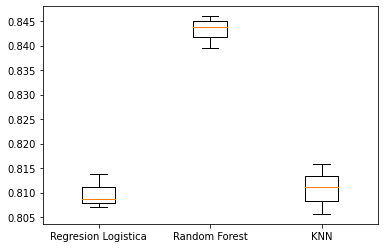

In [ ]:
def val_cross(X_train,X_test, y_train, y_test):    #ajuste de los 3 modelos con validacion cruzada

    modeloutcomes = []
    modelnames = []
    for i,model in enumerate(pipelines):            #recorre la lista de pipelines
        v_results = cross_val_score(model, X_train, y_train, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(pipe_dict[i], v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(pipe_dict[i])
        
    print(modeloutcomes) #accuracy de cada modelo
    
    fig = plt.figure() #plot de accuracies
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)

val_cross(X_train,X_test, y_train, y_test)

Vemos que el Random Forest presenta un accuracy levemente superior a los otros dos modelos. La métrica accuracy, sin embargo, puede no ser la mejor medida para evaluar el rendimiento del modelo cuando las clases de la variable target están desbalanceadas, como en nuestro caso. Por lo tanto, es necesario calcular también las métricas de precision (precisión), recall (sensibilidad), F1 score y curva ROC, que dan una mejor idea de la calidad de los modelos. Dichas métricas se calculan en base a los verdaderos y falsos positivos y negativos de la Matriz de Confusión:



\begin{align}
        Precisión = VP / (VP+FP)
    \end{align}

Un modelo preciso es muy “puro”: tal vez no encuentre todas las cancelaciones, pero es muy probable que los que el modelo clasifique como cancelaciones sean correctas. Un modelo no preciso puede encontrar muchas de las cancelaciones, pero su método de selección es ruidoso: también detecta erróneamente muchas cancelaciones que en realidad no lo son, llevando a un problema de sobreventa.

\begin{align}
        Sensibilidad = VP / (VP + FN)
    \end{align}    

Por otra parte, un modelo con alta sensibilidad tendría éxito en encontrar todas las cancelaciones en los datos, aunque también puede identificar erróneamente algunas no-cancelaciones como cancelaciones. Un modelo con poca sensibilidad no puede encontrar todos (o una gran parte) de los casos positivos en los datos. Esto generaría que se desperdicien oportunidades de venta, en el sentido que se perdería la venta de habitaciones que se van a cancelar. 

Por esta razón, es importante buscar una métrica que balancee ambos aspectos. Para eso utilizamos el F1 score, que combina las medidas de la precisión (precision) y la sensibilidad (recall) en un solo valor (media armónica):

\begin{align}
        F1 score = 2 *\frac{Precision * Recall}{ Precision + Recall}
    \end{align}

En nuestro caso, haremos énfasis en el **F1 Score** dado que necesitamos que nuestro modelo tenga buena sensibilidad para **predecir la mayor cantidad posible de positivos** (es decir, de reservas que se van a cancelar) para poder mantenerlas a la venta y maximizar la cantidad de habitaciones ocupadas y que también sea **preciso**, para no tener gran cantidad de falsos positivos que derive en un problema de sobreventa difícil de manejar.

In [ ]:
#se crea un dataframe con los nombres de las columas, para guardar los resultados de las métricas
metricas = pd.DataFrame(columns = {'Model','Accuracy','Precision','Recall','F1_Score', 'AUC ROC'})    
metricas = metricas[['Model','Accuracy','Precision','Recall','F1_Score', 'AUC ROC']]                 #la reordeno
metricas

,Model,Accuracy,Precision,Recall,F1_Score,AUC ROC



******  Regresion Logistica  *****
La precisión es: 0.8361726002244211

El Informe de Clasificación es:
               precision    recall  f1-score   support

         0.0       0.80      0.93      0.86     22478
         1.0       0.84      0.61      0.71     13339

    accuracy                           0.81     35817
   macro avg       0.82      0.77      0.78     35817
weighted avg       0.81      0.81      0.80     35817

La Matriz de Confusión es:
 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


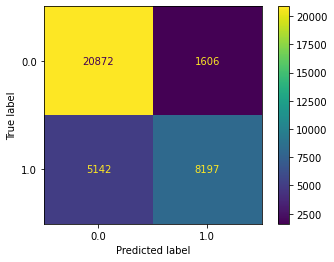


 Área bajo curva ROC del modelo (AUC ROC): 0.8622795106100727


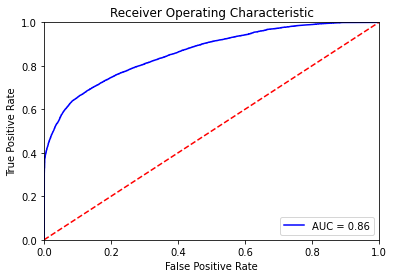


******  Random Forest  *****
La precisión es: 0.8429821608885897

El Informe de Clasificación es:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     22478
         1.0       0.84      0.75      0.79     13339

    accuracy                           0.86     35817
   macro avg       0.85      0.83      0.84     35817
weighted avg       0.85      0.86      0.85     35817

La Matriz de Confusión es:
 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


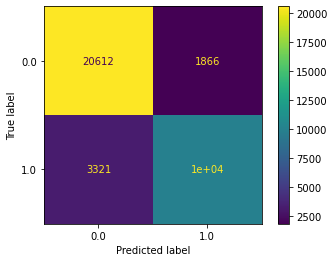


 Área bajo curva ROC del modelo (AUC ROC): 0.9211281719638759


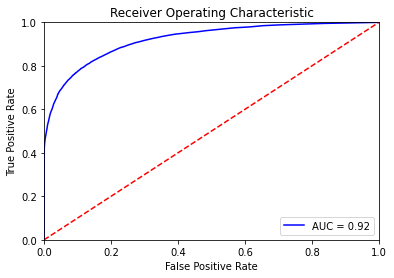


******  KNN  *****
La precisión es: 0.7893379906852961

El Informe de Clasificación es:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.86     22478
         1.0       0.79      0.71      0.75     13339

    accuracy                           0.82     35817
   macro avg       0.81      0.80      0.81     35817
weighted avg       0.82      0.82      0.82     35817

La Matriz de Confusión es:
 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


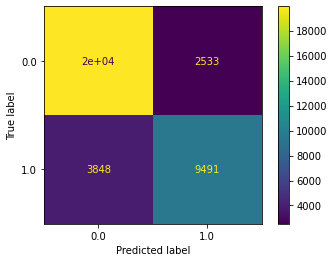


 Área bajo curva ROC del modelo (AUC ROC): 0.8752229058100081


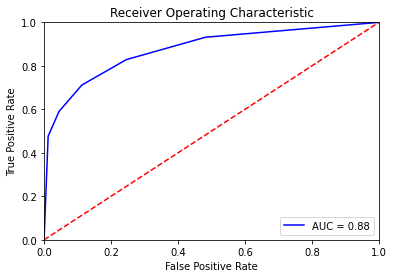

In [ ]:
for i,model in enumerate(pipelines):     #recorre la lista de pipelines
    trainedmodel = model.fit(X_train,y_train)        #entrena el modelo
    
    # Realizamos las predicciones de cada modelo
    ypredict = trainedmodel.predict(X_test)
    
    # Calculamos las métricas
    prec = precision_score(y_test,ypredict)
    accur = accuracy_score(y_test, ypredict)
    rec = recall_score(y_test, ypredict)
    f1score = f1_score(y_test,ypredict)
    classreport = classification_report(y_test,ypredict)
    confMat = confusion_matrix(y_test,ypredict)

    # Imprimimos resultados
    print('\n******  '+pipe_dict[i]+'  *****')
    print('La precisión es: {}'.format(prec))
    print('\nEl Informe de Clasificación es:\n {}'.format(classreport))
    print('La Matriz de Confusión es:\n ')
    
    #Ploteamos la Matriz de confusión
    plot_confusion_matrix(trainedmodel, X_test, y_test)
    plt.show()    

    class_probabilities = trainedmodel.predict_proba(X_test)
    preds = class_probabilities[:, 1]

    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # AUC (área bajo la curva ROC)
    print(f"\n Área bajo curva ROC del modelo (AUC ROC): {roc_auc}")

    # Gráfica de la Curva ROC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #Guardamos los resultados en el nuevo dataframe para luego visualizar
    metricas = metricas.append({'Model':pipe_dict[i], 'Accuracy':accur, 'Precision':prec, 
                                'Recall':rec, 'F1_Score':f1score, 'AUC ROC':roc_auc}, ignore_index=True)

In [ ]:
metricas.head()   # visualización del df de métricas

,Model,Accuracy,Precision,Recall,F1_Score,AUC ROC
0,Regresion Logistica,0.811598,0.836173,0.614514,0.708409,0.862280
1,Random Forest,0.855181,0.842982,0.751031,0.794354,0.921128
2,KNN,0.821844,0.789338,0.711523,0.748413,0.875223


Se realiza un gráfico tipo radar para comparar visualmente las métricas de los distintos modelos. En cada eje polar se representan las métricas y en el diámetro polar, su magnitud.

In [ ]:
categories = ['Accuracy','Precision','Recall','F1_Score', 'AUC ROC']   #nombre de los ejes polares

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=metricas.iloc[0, 1:6],           # en el radio polar, se muestran los valores de la metrica correspondiente  
      theta=categories,
      fill='toself',
      name=pipe_dict[0]            # nombre del modelo
))
fig.add_trace(go.Scatterpolar(
      r=metricas.iloc[1, 1:6],
      theta=categories,
      fill='toself',
      name=pipe_dict[1]
))
fig.add_trace(go.Scatterpolar(
      r=metricas.iloc[2, 1:6],
      theta=categories,
      fill='toself',
      name=pipe_dict[2]
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]             
    )),
  showlegend=True
)

fig.show()

El mejor modelo es el Random Forest (línea roja) porque tiene mayor F1 score que el resto. Continuamos entonces con el Random Forest.

### Mejora del modelo elegido (Random Forest): hipertuning de F1 Score  (métrica priorizada)

Primero, comparamos la exactitud el modelo base de los sets de entrenamiento y evaluación para saber hay sobreajuste. El problema del sobreajuste es que el modelo está sobre-entrenado en los datos de training y falla en predecir nuevas observaciones. 

In [ ]:
RF = RandomForestClassifier() #modelo base

RF.fit(X_train, y_train)  #ajustamos el modelo base


RandomForestClassifier()

In [ ]:
y_train_pred_RF = RF.predict(X_train) #Predicción en Train
y_test_pred_RF = RF.predict(X_test) #Predicción en Test


In [ ]:
#Calculamos el accuracy para los sets Train y test
train_accuracy_RF= accuracy_score(y_train, y_train_pred_RF)
test_accuracy_RF = accuracy_score(y_test, y_test_pred_RF)

print('Proporción de aciertos sobre el set de entrenamiento:', train_accuracy_RF) 
print('Proporción de aciertos sobre el set de evaluación:',test_accuracy_RF) 

Proporción de aciertos sobre el set de entrenamiento: 0.989135247029543
Proporción de aciertos sobre el set de evaluación: 0.8558226540469609


La brecha en exactitud indica que hay sobreajuste. Es de esperar que el sobreajuste se vea también en el F1 Score, lo comprobamos:

In [ ]:
#Calculamos F1 score para los sets Train y test
train_f1_RF= f1_score(y_train, y_train_pred_RF)
test_f1_RF = f1_score(y_test, y_test_pred_RF)

print('F1 Score sobre el set de entrenamiento:', train_f1_RF) 
print('F1 Score sobre el set de evaluación:', test_f1_RF)

F1 Score sobre el set de entrenamiento: 0.9852376926578656
F1 Score sobre el set de evaluación: 0.7955661124307205


Para solucionar el sobreajuste del modelo RF (modelo base), realizamos entonces el **hipertuning** de los parámetros del modelo para reducir esa brecha. Además buscaremos optimizar el F1 score. 


Usando el método RandomizedSearchCV de Scikit-Learn, definimos una grilla de rangos de hiperparámetros y pedimos que se optimice la métrica de F1 Score. De esa grilla, el método toma una muestra aleatoria de hiperparámetros, corre diferentes modelos con K-Fold CV y arroja la mejor combinación de hiperparámetros encontrada. Esta primera combinación a los mejores hiperparámetros se utiliza luego para realizar una búsqueda más acotada con el método GridSearchCV. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'bootstrap': [True, False], #definimos la grilla de hiperparámetros
               'max_depth': [5,10, 20, 30],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [50, 100, 150, 200]}

RF_random = RandomizedSearchCV(estimator = RF, #búsqueda aleatoria de hiperparámetros dentro de random_grid
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=0, 
                               random_state=42, 
                               scoring= "f1", #busca los mejores parámetros para la métrica 
                               refit=True, 
                               n_jobs=2, 
                               return_train_score=True) 

In [ ]:
RF_random.fit(X_train, y_train) #se ajustan modelos utilizando algunas de las combinaciones aleatorias

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, return_train_score=True, scoring='f1')

In [ ]:
RF_random.best_params_ #muestra los mejores hiperparámetros encontrados

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

Ahora corremos un nuevo modelo RF_random_1 con los mejores hiperparámetros encontrados en el RandomGrid y calculamos su F1 score sobre train y test sets para ver si aumentaron y si se solucionó el sobreajuste:

In [ ]:
RF_random_1 = RandomForestClassifier(bootstrap = True,   
 max_depth = 30,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 200)                    
                       
RF_random_1.fit(X_train, y_train) #corremos el modelo

y_train_pred_RF_random_1 = RF_random_1.predict(X_train) #predecimos sobre el set de entrenamiento con el nuevo modelo
y_test_pred_RF_random_1 = RF_random_1.predict(X_test) #predecimos sobre el set de evaluación

#Calculamos el f1 score para los sets Train y test
train_f1_RF_random_1= f1_score(y_train, y_train_pred_RF_random_1)
test_f1_RF_random_1= f1_score(y_test, y_test_pred_RF_random_1)

print('F1 Score sobre el set de entrenamiento:', train_f1_RF_random_1) 
print('F1 Score sobre el set de evaluación:', test_f1_RF_random_1)


F1 Score sobre el set de entrenamiento: 0.8994054857451695
F1 Score sobre el set de evaluación: 0.7921967769296012


Con los hiperparámetros propuestos todavía hay sobreajuste. Probamos disminuyendo la profundidad de los árboles, que suelen generar este inconveniente.

In [ ]:
RF_random_2 = RandomForestClassifier(bootstrap = True,   
 max_depth = 20,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 200)                    
                       
RF_random_2.fit(X_train, y_train) #corremos el modelo

y_train_pred_RF_random_2 = RF_random_2.predict(X_train) #predecimos sobre el set de entrenamiento con el nuevo modelo
y_test_pred_RF_random_2 = RF_random_2.predict(X_test) #predecimos sobre el set de evaluación

#Calculamos la precisión para los sets Train y test
train_f1_RF_random_2= f1_score(y_train, y_train_pred_RF_random_2)
test_f1_RF_random_2= f1_score(y_test, y_test_pred_RF_random_2)

print('F1 score sobre el set de entrenamiento:', train_f1_RF_random_2) 
print('F1 score sobre el set de evaluación:', test_f1_RF_random_2)

F1 score sobre el set de entrenamiento: 0.7970931685890796
F1 score sobre el set de evaluación: 0.7632651346468932


Se redujo la brecha en el F1 score de ambos sets, indicando que se solucionó el problema del sobreajuste, con lo cual el nuevo modelo será más confiable en predecir nuevas observaciones. El F1 score quedó prácticamente igual que en el modelo base. Vemos las métricas del nuevo modelo:

In [ ]:
classreport_RF_random_2 = classification_report(y_test,y_test_pred_RF_random_2)
print('\nEl Informe de Clasificación del nuevo Random Forest es:\n {}'.format(classreport_RF_random_2))


El Informe de Clasificación del nuevo Random Forest es:
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88     22478
         1.0       0.87      0.68      0.76     13339

    accuracy                           0.84     35817
   macro avg       0.85      0.81      0.82     35817
weighted avg       0.85      0.84      0.84     35817



Con los hiperparámetros encontrados en el hipertuning, se solucionó el sobreajuste y se conservó el valor de F1 score (aumentó levemente la precisión y disminuyó levemente la sensibilidad).

Basados en los hiperparámetros encontrados, realizamos una búsqueda más acotada con el método GridSearchCV, donde se prueban combinaciones puntuales de hiperparámetros, para intentar mejorar un poco más el F1 score.

In [ ]:
param_grid = { #probamos diferentes opciones para los hiperparámetros en base a lo obtenido en el random search
    'bootstrap' : [True],
    'max_depth': [20], #diferentes profundidades de los árboles
    'max_features': ['sqrt'], #máxima cantidad de variables que se consideran en cada split
    'min_samples_leaf' : [1,2,3],
    'min_samples_split' : [1, 3, 5],
    'n_estimators': [200, 250] #cantidad de árboles en el bosque
} 

RF_grid = GridSearchCV(estimator = RF, 
                           param_grid = param_grid, 
                           cv =3, 
                           verbose = 0,
                           scoring= "f1", 
                           refit= True, #busca los mejores parámetros para la métrica F1 score
                           n_jobs=2, 
                           return_train_score=True)

In [ ]:
RF_grid.fit(X_train, y_train) #se ajustan los modelos utilizando las combinaciones especificadas en el param_grid #tarda aprox 30 minutos en correr

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


18 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True], 'max_depth': [20],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 3, 5],
                         'n_estimators': [200, 250]},
             return_train_score=True, scoring='f1')

In [ ]:
RF_grid.best_params_ #muestra los mejores hiperparámetros encontrados

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 250}

In [ ]:
RF_grid = RandomForestClassifier(bootstrap = True,   
 max_depth = 20,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 3,
 n_estimators = 250)                    
                       
RF_grid.fit(X_train, y_train) #corremos el modelo

y_train_pred_RF_grid = RF_grid.predict(X_train) #predecimos sobre el set de entrenamiento con el nuevo modelo
y_test_pred_RF_grid = RF_grid.predict(X_test) #predecimos sobre el set de evaluación

#Calculamos f1 para los sets Train y test
train_f1_RF_grid= f1_score(y_train, y_train_pred_RF_grid)
test_f1_RF_grid= f1_score(y_test, y_test_pred_RF_grid)

print('F1 score sobre el set de entrenamiento:', train_f1_RF_grid) 
print('F1 sobre el set de evaluación:', test_f1_RF_grid)


F1 score sobre el set de entrenamiento: 0.8074871049506355
F1 sobre el set de evaluación: 0.7675752627391869


El modelo obtenido con GridSearch (RF_grid) tiene una milésimas más de F1 score que el obtenido con RandomGrid (RF_random_1), por lo tanto continuamos con el primero. 

In [ ]:
#creamos un dataframe con los nombres de las columnas, para guardar las métricas
new_metricas = pd.DataFrame(columns = {'Model','Accuracy','Precision','Recall','F1_Score', 'AUC ROC'})    
new_metricas = new_metricas[['Model','Accuracy','Precision','Recall','F1_Score', 'AUC ROC']]                 #lo reordenamos


El Informe de Clasificación es:
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88     22478
         1.0       0.87      0.69      0.77     13339

    accuracy                           0.85     35817
   macro avg       0.85      0.81      0.83     35817
weighted avg       0.85      0.85      0.84     35817

La Matriz de Confusión es:
 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



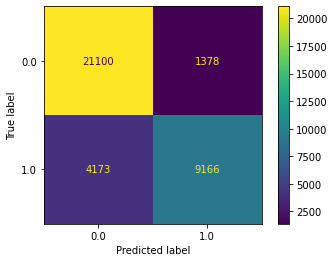


 Área bajo curva ROC del modelo (AUC ROC): 0.9186567531247837


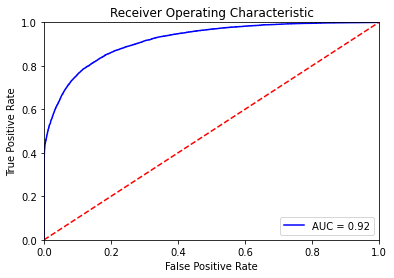

In [ ]:
# Métricas
ypredict = RF_grid.predict(X_test)      
    
# Calculamos las métricas
prec = precision_score(y_test,ypredict)
accur = accuracy_score(y_test, ypredict)
rec = recall_score(y_test, ypredict)
f1score = f1_score(y_test,ypredict)
classreport = classification_report(y_test,ypredict)
confMat = confusion_matrix(y_test,ypredict)

# Imprimimos resultados
print('\nEl Informe de Clasificación es:\n {}'.format(classreport))
print('La Matriz de Confusión es:\n ')
    
#Ploteamos la Matriz de confusión
plot_confusion_matrix(RF_grid, X_test, y_test)
plt.show()    

class_probabilities = RF_grid.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC (área bajo la curva ROC)
print(f"\n Área bajo curva ROC del modelo (AUC ROC): {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

    #Guardamos los resultados en el nuevo dataframe para luego visualizar
new_metricas = new_metricas.append({'Model':"RandomForest", 'Accuracy':accur, 'Precision':prec, 
                            'Recall':rec, 'F1_Score':f1score, 'AUC ROC':roc_auc}, ignore_index=True)

In [ ]:
# Visualización de métricas optimizadas
new_metricas.head()   

,Model,Accuracy,Precision,Recall,F1_Score,AUC ROC
0,RandomForest,0.845018,0.86931,0.687158,0.767575,0.918657


##### Ejemplo de Hipertuning usando GridSearch y Pipeline (sólo para mostrar la metodología) 

Aquí mostramos un camino más automatizado para realizar el hipertuning combinando el GridSearch con un pipeline.

In [ ]:
# Se crea un pipleline con el modelo elegido
pipe = Pipeline([('classifier', RandomForestClassifier())])

In [ ]:
pipe.fit(X_train, y_train)  #ajustamos el modelo

y_train_pred_RF = pipe.predict(X_train) #Predicción en Train
y_test_pred_RF = pipe.predict(X_test) #Predicción en Test

#Calculamos el accuracy para los sets Train y test
train_accuracy_RF= accuracy_score(y_train, y_train_pred_RF)
test_accuracy_RF = accuracy_score(y_test, y_test_pred_RF)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_RF) 
print('% de aciertos sobre el set de evaluación:',test_accuracy_RF) 

% de aciertos sobre el set de entrenamiento: 0.9891113158555993
% de aciertos sobre el set de evaluación: 0.8561297707792389


In [ ]:
# Se crea diccionario de algoritmos e hyperparametros
grid_param = [
              { "classifier": [RandomForestClassifier()],   
                "classifier__n_estimators": [50,100,200],   # cantidad de arboles en el bosque
                "classifier__max_depth": [10, 20],  # prof de los arboles 
                "classifier__min_samples_leaf": [1, 2, 3],
                "classifier__bootstrap": [True],
              },
              { "classifier": [RandomForestClassifier()],
                "classifier__n_estimators": [10, 100, 300],   # cantidad de arboles en el bosque
                "classifier__max_depth": [ 8, 15, 25],  # profundidad de los arboles 
                "classifier__min_samples_leaf": [1, 5, 10],
                "classifier__max_leaf_nodes": [2, 5, 10],
              }]

In [ ]:
# se crea el gridsearch
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0, n_jobs=-1)

# Entrenamiento de grid
best_model = gridsearch.fit(X_train, y_train)      #ejecucion 30 min

In [ ]:
print(best_model.best_estimator_)


Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200))])


In [ ]:
best_model.best_params_

{'classifier': RandomForestClassifier(max_depth=20, n_estimators=200),
 'classifier__bootstrap': True,
 'classifier__max_depth': 20,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 200}

In [ ]:
# Se crea el nuevo modelo con los hiperparametros encontrados
RF3 = RandomForestClassifier(bootstrap = True, 
                             max_depth = 20, 
                             max_features = 'auto', 
                             min_samples_leaf = 1, 
                             n_estimators = 200) #similar a RF2 pero dejando min_sample_split por defecto

In [ ]:
RF3.fit(X_train, y_train)

y_train_pred_RF3 = RF3.predict(X_train) #predecimos sobre el set de entrenamiento con el nuevo modelo
y_test_pred_RF3 = RF3.predict(X_test) #predecimos sobre el set de evaluación

train_accuracy_RF3 = accuracy_score(y_train, y_train_pred_RF3) #calculamos los accuracies en cada set
test_accuracy_RF3 = accuracy_score(y_test, y_test_pred_RF3)

print('Accuracy sobre el set de entrenamiento:', train_accuracy_RF3)
print('Accuracy sobre el set de evaluación:',test_accuracy_RF3)

train_precision_RF3 = precision_score(y_train, y_train_pred_RF3) #calculamos la precisión en cada set
test_precision_RF3 = precision_score(y_test, y_test_pred_RF3)

print('Precisión sobre el set de entrenamiento:', train_precision_RF3)
print('Precisión sobre el set de evaluación:',test_precision_RF3)

Accuracy sobre el set de entrenamiento: 0.8754382396228447
Accuracy sobre el set de evaluación: 0.846078677722869
Precisión sobre el set de entrenamiento: 0.8945238737523604
Precisión sobre el set de evaluación: 0.868594574227581


Se ajustó el modelo con los mejores hiperparámetros encontrados. Se observa que no hay sobreajuste, ya que los porcentajes de accuracy y precisión en los sets de entrenamiento y test son similares. El RF3 tiene una precisión el set de evaluación unos decimales inferior a RF2 (se debe a que en RF2 ajustamos un hiperparámetro más, el min_sample_split, que quedó por defecto en RF3) así que continuamos con RF2.

Se calcula cada métrica con el modelo mejorado (RF2):

In [ ]:
# Visualización de métricas optimizadas
new_metricas.head()   

,Model,Accuracy,Precision,Recall,F1_Score,AUC ROC
0,RandomForest,0.845,0.87,0.686,0.767,0.918


Se observa una mejoría de 3 puntos porcentuales en la precisión del nuevo modelo respecto al modelo base (con hiperparámetros por default). La sensibilidad, por el contrario, bajó en 6 puntos porcentuales en el nuevo modelo, lo cual hizo disminuir el f1 score en 3 puntos porcentuales. Finalmente, el AUC ROC se mantiene igual. 
Como la precisión es la métrica que priorizamos, consideramos que el modelo RF2 es mejor que el base. El hipertuning de los hiperparámetros, en conclusión, permitió encontrar un nuevo modelo con mayor precisión que el modelo original.

#### Predicción de probabilidades 

Para analizar con qué seguridad el modelo está prediciendo las clases, miramos las probabilidades de cada una de las observaciones de pertenecer a una u otra clase.  

In [ ]:
# Predicción de probabilidades
predic_probabilities = RF_grid.predict_proba(X_test)    #.predict_proba nos da la probabilidad con la que se clasificó cada observación  
predic_probabilities

array([[0.77217656, 0.22782344],
       [0.37592308, 0.62407692],
       [0.95927597, 0.04072403],
       ...,
       [0.31486173, 0.68513827],
       [0.69439173, 0.30560827],
       [0.        , 1.        ]])

El resultado es un array con una fila por observación y tantas columnas como clases tenga la variable respuesta (en este caso, dos). El valor de la primera columna se corresponde con la probabilidad de que la observación pertenezca a la clase 0 (NO canceló) y la segunda a la clase 1 (Canceló). El valor de probabilidad mostrado para cada predicción se corresponde con la fracción de observaciones de cada clase en los nodos terminales a los que ha llegado la observación predicha en el conjunto de los árboles y por lo tanto da una idea de la confianza con el que el modelo predice.

Para visualizarlo, realizamos el gráfico de densidad de las cancelaciones predichas y lo superponemos a las cancelaciones observadas (en el set de evaluación).

In [ ]:
df_probas = pd.DataFrame(predic_probabilities) #convertimos el array de probabilidades predichas a dataframe
df_probas.rename({0: "No canceló (pred)", 1: "Canceló (pred)"}, axis=1, inplace=True)
df_probas #la probabilidad predicha de cancelar y no cancelar para una misma observación son, lógicamente, complementarias (o sea, suman 1)

,No canceló (pred),Canceló (pred)
0,0.772177,0.227823
1,0.375923,0.624077
2,0.959276,0.040724
3,0.924947,0.075053
4,0.346418,0.653582
...,...,...
35812,0.885164,0.114836
35813,0.518228,0.481772
35814,0.314862,0.685138
35815,0.694392,0.305608


In [ ]:
df_target_test = pd.DataFrame(y_test) #convertimos la lista y_test en dataframe
df_target_test.reset_index(drop=True,inplace=True)
df_target_test

,is_canceled
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
35812,0.0
35813,1.0
35814,1.0
35815,0.0


In [ ]:
ytest = df_target_test.is_canceled

In [ ]:
df_probas["Canceló (obs)"] = ytest #agregamos la columna ytest al dataframe de probabilidades

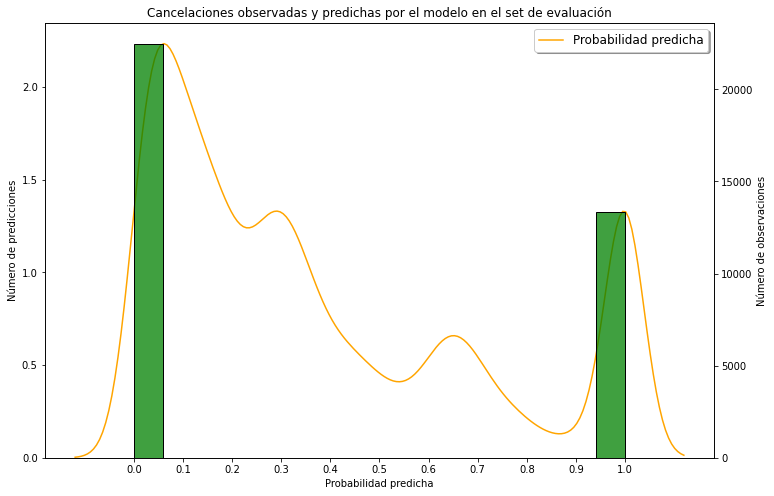

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax1 = sns.kdeplot(data=df_probas, x="Canceló (pred)", color="orange", label= "Probabilidad predicha")
ax2 = ax1.twinx()    # para tener dos ejes y con diferente escala
ax2 = sns.histplot(data=df_probas, x='Canceló (obs)', color="green", label = ['No canceló (obs)', 'Canceló (obs'])   

ax.set_title("Cancelaciones observadas y predichas por el modelo en el set de evaluación")
ax.set_ylabel("Número de predicciones")
ax.set_xlabel("Probabilidad predicha")
ax.xaxis.set_ticks(np.arange(0, 1.1, 0.1))

ax2.set_ylabel("Número de observaciones")

legend = ax.legend(loc='upper right', shadow=True, fontsize='large')
plt.show()

En el gráfico se observa la función de densidad de las cancelaciones predichas (naranja) y un histograma de las cancelaciones observadas (verde).
El histograma presenta sólo 2 bines que corresponden a las dos clases observadas: No canceló (centrado en cero) y Canceló (centrado en 1). 
La función de densidad, por su parte, muestra 2 picos principales. El primer pico principal (desde la izquierda) corresponde al número de predicciones cuya probabilidad está muy cerca de 0, es decir, el modelo está "muy seguro" de que esas reservas no se cancelarán. El segundo pico principal (desde la izquierda) corresponde a las predicciones cuya probabilidad está muy cerca de 1, o sea, aquellas que el modelo está "muy seguro" de que se cancelarán. Las predicciones que están en el medio de ambos picos están más cerca de la probabilidad = 0.5 (que se utiliza como corte para clasificar las clases) y eso indica que, si bien el modelo las predice como una clase o la otra, son menos precisas y es donde el modelo falla principalmente. 

#### Importancia de variables

Calculamos la importancia de las variables para el modelo de clasificación final RF_grid:

In [ ]:
importances = RF_grid.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

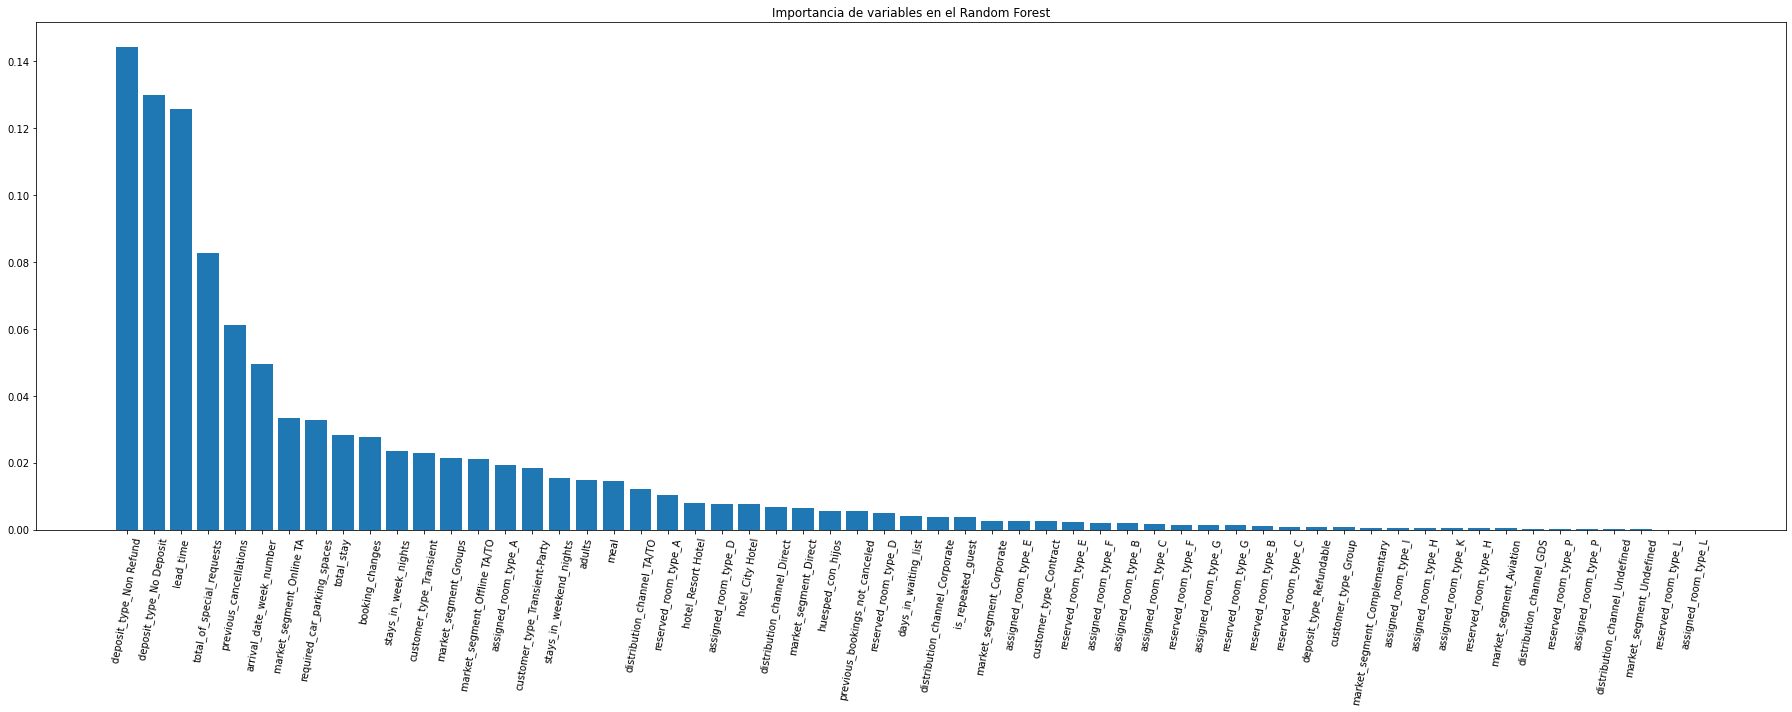

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Importancia de variables en el Random Forest')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=80)
plt.tight_layout()
plt.show()

El gráfico de importancia de variables indica que la mayoría de las variables tienen poco peso para la clasificación. Las primeras 6 variables más importantes (tipo de depósito, el tiempo de ciclo, la cantidad de requerimientos especiales, las cancelaciones previas y la semana del año de arribo) tienen un peso entre 0.05 y 0.15; y el resto de las variables tiene menos de 0.04. Esto implica que no hay una variable en particular que pueda explicar o distinguir las dos clases (canceló y no canceló) sino que más bien el modelo necesita contemplar muchas de las variables estudiadas para poder clasificar.  

### Conclusión sobre los modelos analizados

Los tres modelos evaluados tuvieron desempeños similares en la predicción de la cancelación de reservas (se visualiza en el grafico radar) siendo el modelo de **RandomForest** el que presentó mejores métricas, en particular F1 Score (la que más nos interesaba). El modelo base, sin embargo, presentaba sobreajuste por lo cual fue necesario realizar el hipertuning de hiperparámetros. Así se obtuvo un modelo sin sobreajuste que posee un F1 score de 77%, con una precisión de 87% y sensibilidad de 69% para predecir qué reservas se cancelarán.  

## 11. Ganancias estimadas con la utilización del modelo

In [ ]:
df.info()    # utilizo el data set inicial ya que contiene las variables de fecha

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  object        
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

A partir del contexto global de la situación del turismo en general y en particular en este dataset, con el análisis de la tasa de cancelaciones, se sabe que hay entre un 35 y 40 % de cancelaciones en las reservas.

Haciendo una estimación con las reservas del 2017, contamos la cantidad de reservas y calculamos las ganancias sin cancelaciones. 

In [ ]:
# Cantidad de reservas del 2017

df_anio = df[(df.Date.dt.year == 2017)]  
print("El número de reservas del 2017 fue de: ", len(df_anio))

El numero de reservas del 2017 fue de:  40687


In [ ]:
# Calcular estadia promedio y cantidad de huspedes promedio

df_anio.total_stay.describe()          

count    40687.000
mean         3.575
std          2.633
min          0.000
25%          2.000
50%          3.000
75%          4.000
max         56.000
Name: total_stay, dtype: float64

In [ ]:
df_anio.adults.describe()   

count    40687.000
mean         1.878
std          0.496
min          0.000
25%          2.000
50%          2.000
75%          2.000
max          4.000
Name: adults, dtype: float64

In [ ]:
df_anio.huesped_con_hijos.describe()    # El porcentaje de adultos con hijos es muy pequeño

count    40687.000
mean         0.092
std          0.289
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          1.000
Name: huesped_con_hijos, dtype: float64

En el 2017, podemos promediar estadías de 4 días y 2 adultos. El valor promedio de una estadía (1 noche) para dos adultos es de 120 dólares estadounidenses. 

In [ ]:
# Multiplicar por valor promedio estimado de estadia

estadia = 120 * 4
GananciaSinCan = len(df_anio) * estadia
print("Costo promedio de la estadia es: ", estadia)

miles_translator = str.maketrans(".,", ",.")
GananciaSinCanc = "{:,}".format(GananciaSinCan).translate(miles_translator)

print("Ganancias del Hotel por reservas SIN CANCELACIONES: ", GananciaSinCanc, " dolares")

Costo promedio de la estadia es:  480
Ganancias del Hotel por reservas SIN CANCELACIONES:  19.529.760  dolares


In [ ]:
# Descontar el 40% por cancelaciones en reservas

perdidas = GananciaSinCan * 0.4
Perdidas = "{:,}".format(perdidas).translate(miles_translator)

print("Pendidas por cancelaciones (40%): ", Perdidas, " dolares")

Pendidas por cancelaciones (40%):  7.811.904,0  dolares


El modelo predictivo obtenido predice con un 87% de precisión si una reserva será cancelada o no. De esta manera se puede poner a disponibilidad de venta las habitaciones/estadías que tienen un alta probabilidad de cancelación, recaudando nuevamente el valor de esas estadías. 

Con lo cual se puede estimar que, si en este último año se hubiera usado el modelo predictivo, las pérdidas por cancelaciones serian un 27% menor:

In [ ]:
# calcular el 87% del recaudado anual

GananciasPredichas = GananciaSinCan * 0.87
ganpred = "{:,}".format(GananciasPredichas).translate(miles_translator)

print("Las ganancias del Hotel, usando el modelo predictivo de posibles cancelaciones de reservas, hubieran sido de aproximadamente: ", ganpred, " dolares")
## sobre el importe de las reservas totales, restar el 13% por mala estimacion y me dara la ganancia con el modelo, respecto al 40% anterior

Las ganancias del Hotel, usando el modelo predictivo de posibles cancelaciones de reservas, hubieran sido de aproximadamente:  16.990.891,2  dolares


En resumen, el hotel presentó durante el 2017, pérdidas por 7.811.904,0  dolares, obteniendo una ganancia neta aproximada de: 


In [ ]:
NetoReal = GananciaSinCan - perdidas

neto = "{:,}".format(NetoReal).translate(miles_translator)

print("Ganancia neta aprox durante el 2017 de: ", neto, " dolares")

Ganancia neta aprox durante el 2017 de:  11.717.856,0  dolares


Con el modelo predictivo, durante el 2017 los ingresos hubieran sido aproximadamente 16.990.891 dólares, lo que representa un **incremento de más de 5 millones de dólares** respecto al escenario sin las predicciones.

## 12. Conclusiones generales

- A partir de un dataset que incluía información sobre reservas efectivizadas y canceladas junto con atributos de los clientes y los hoteles, fue posible desarrollar un modelo de predicción de cancelación de reservas. 
- Se propusieron y evaluaron tres modelos de clasificación -Regresión logística, K nearest neighbours y Random forest- para predecir las cancelaciones.
- Los 3 modelos tuvieron desempeños similares en la predicción de la cancelación de reservas, siendo el RandomForest el que presentó mejores métricas de F1 score, precisión, sensibilidad y ROC.
- La métrica priorizada fue el F1 score ya que se buscó un balance entre la sensibilidad (posibilidad de detectar las cancelaciones) y la precisión (seguridad con la que se predice la cancelación).
- El sobreajuste del modelo de Random forest original obtenido por defecto se pudo mejorar realizando el hipertuning de hiperparámetros. El nuevo modelo obtenido, por lo tanto, es más robusto para predecir nuevas observaciones. Al mismo tiempo, se conservaron los valores de las métricas que en el modelo original. 
- El modelo Random forest obtenido presentó un 77% de F1 score, con 87% de precisión y 69% de sensibilidad para predecir la cancelación de reservas.
- Los hoteles que decidan implementar este modelo podrán detectar con alta probabilidad y precisión si una reserva se cancelará y, de esta forma, podrán seguir ofreciéndola para la venta, mejorando la rentabilidad de su negocio. 
- Utilizando el modelo de propuesto (y en base a los datos del último año del dataset), se obtendría una **ganancia de más de 5 millones de dólares al año** que sin usar el modelo. 


